# Unsupervised Learning Capstone
## Clustering Home Features

## Introduction
Welcome! <br>
This data set is an open source insight into the housing market in Ames Iowa. 

We are a group of real estate investors and need to understand the best approaches to deploying our capital in today's housing market. 

Main objective is to see if these properties can be categorized based on their characteristics. If successful, then we will identify the best model and recommend further anlysis into each group to identify which of the properties (if any) can be classified as rentals, flippers, or too risky. 

## Hypothesis
Unsupervised clustering algorithms can assign each property to reasonable groups, which can then be further analyzed. 

## Methods
We will clean up and explore the data that will ultimately go into the models. Once we finalize the data set, we will reduce the dimensionality with 2 methods: PCA and UMAP, and then apply the following clustering algorithms: K-means, Hierarchical, and Gaussian Mixture Model (GMM) clustering algorithms. The best model will be identified and recommended for further analysis.

Let's begin!

### Import Packages

In [1]:
# Import dataframe/number packages
import pandas as pd
import numpy as np

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Import stat packages
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import norm, skew #for some statistics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

# regression models/model helpers
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import NearestNeighbors

# clustering models
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.stats import norm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, MiniBatchKMeans

# dimensionality reduction methods
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler


from scipy.cluster.hierarchy import fcluster

from IPython.display import Image
import time
# Shutup Warnings!
import warnings
warnings.filterwarnings('ignore')

# pd set options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.reset_option('display.float_format')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)


from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

What do we know about Ames Iowa? 

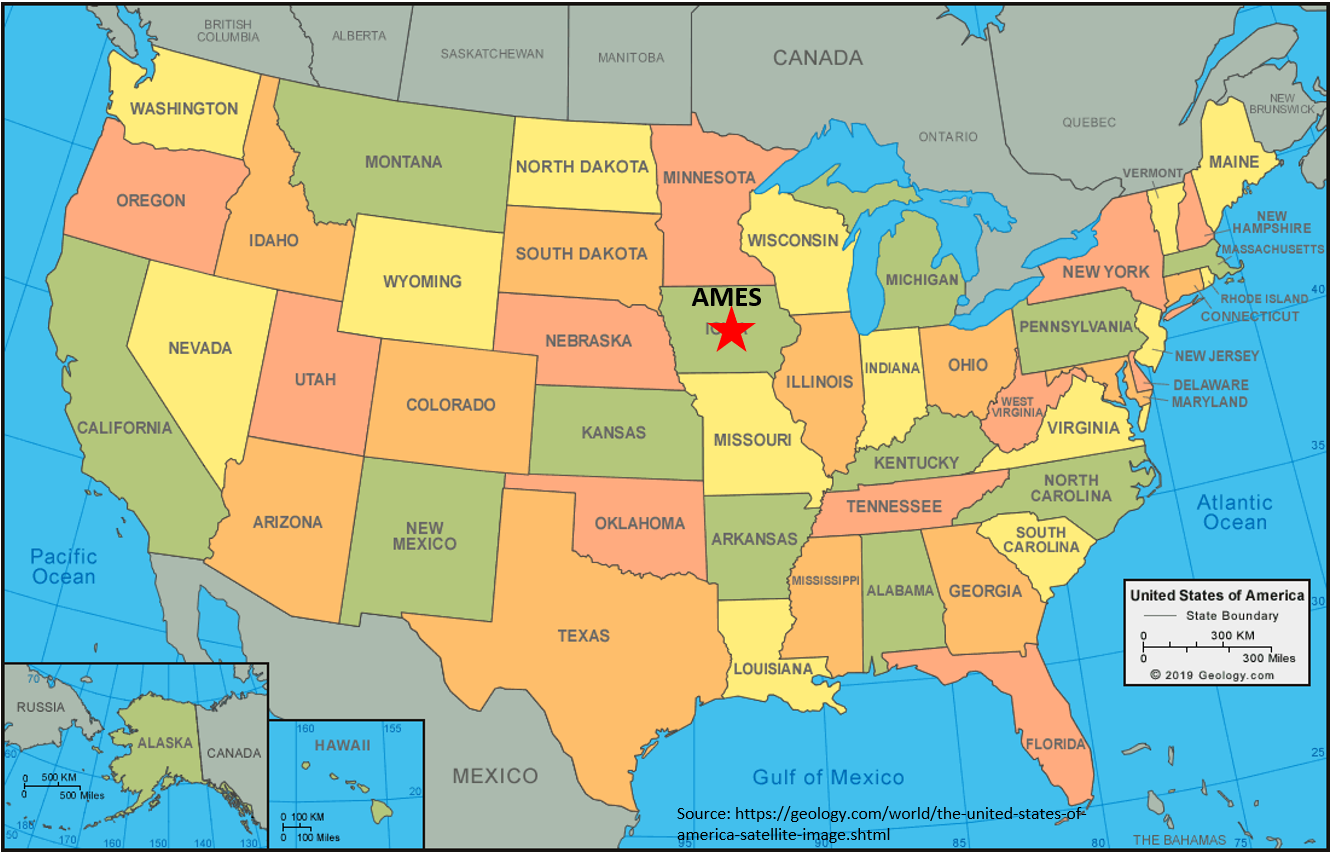

In [2]:
Image("AMES.PNG")

__About Ames Iowa__ [Click here for more stats](http://www.city-data.com/city/Ames-Iowa.htm)
- Population: 67,000
- Median age: 23.8 years (15 years younger than state median)
- Median household income: 51,860(USD) (7,000 less than state median)
- Median house or condo value: 216,000(USD) (75,000 higher than state median)

Relatively young population compared to the rest of Iowa, which could explain the lower comparative income. The city has grown about 31% since 2000, which could support the relatively expensive home values.

Now that we've acquainted ourselves with the city, let's jump in to the data.

# 1. Load and Explore Data

In [3]:
df_houseprices = pd.read_csv('house_prices.csv')
df_houseprices.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 1.1 Data Exploration
Let's learn a bit about the data at a high level.

In [4]:
# define shape of df (rows, colunms)
df_houseprices.shape

(1460, 81)

In [5]:
# finds what data types exist
df_houseprices.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
# basic statistical overview that includes all of the data
df_houseprices.describe(include = 'all')

Id  MSSubClass MSZoning  LotFrontage    LotArea Street Alley  \
count  1460.000    1460.000     1460     1201.000   1460.000   1460    91   
unique      nan         nan        5          nan        nan      2     2   
top         nan         nan       RL          nan        nan   Pave  Grvl   
freq        nan         nan     1151          nan        nan   1454    50   
mean    730.500      56.897      NaN       70.050  10516.828    NaN   NaN   
std     421.610      42.301      NaN       24.285   9981.265    NaN   NaN   
min       1.000      20.000      NaN       21.000   1300.000    NaN   NaN   
25%     365.750      20.000      NaN       59.000   7553.500    NaN   NaN   
50%     730.500      50.000      NaN       69.000   9478.500    NaN   NaN   
75%    1095.250      70.000      NaN       80.000  11601.500    NaN   NaN   
max    1460.000     190.000      NaN      313.000 215245.000    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460     1460.000     1460.000   
unique          9          8        5          8          nan          nan   
top          Norm       Norm     1Fam     1Story          nan          nan   
freq         1260       1445     1220        726          nan          nan   
mean          NaN        NaN      NaN        NaN        6.099        5.575   
std           NaN        NaN      NaN        NaN        1.383        1.113   
min           NaN        NaN      NaN        NaN        1.000        1.000   
25%           NaN        NaN      NaN        NaN        5.000        5.000   
50%           NaN        NaN      NaN        NaN        6.000        5.000   
75%           NaN        NaN      NaN        NaN        7.000        6.000   
max           NaN        NaN      NaN        NaN       10.000        9.000   

        YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count    1460.000      1460.000      1460     1460        1460        1460   
unique        nan           nan         6        8          15          16   
top           nan           nan     Gable  CompShg     VinylSd     VinylSd   
freq          nan           nan      1141     1434         515         504   
mean     1971.268      1984.866       NaN      NaN         NaN         NaN   
std        30.203        20.645       NaN      NaN         NaN         NaN   
min      1872.000      1950.000       NaN      NaN         NaN         NaN   
25%      1954.000      1967.000       NaN      NaN         NaN         NaN   
50%      1973.000      1994.000       NaN      NaN         NaN         NaN   
75%      2000.000      2004.000       NaN      NaN         NaN         NaN   
max      2010.000      2010.000       NaN      NaN         NaN         NaN   

       MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452    1452.000      1460      1460       1460     1423   
unique          4         nan         4         5          6        4   
top          None         nan        TA        TA      PConc       TA   
freq          864         nan    

In [7]:
# break down how many non-null values and dtype for each column
df_houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# determine which columns are likely categorical vs continuous variables
# look at the lower numbers to recognize potential categorical variables
df_houseprices.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

Painless so far. We already learned the following:
- There are multiple types of data (object, int, float)
- There are nulls
- Certain to stumble on to skewed variables
- Ranges of data vary wildly
- Dates of sales activity are from 2006 - 2010

## 1.2 Analyzing Target Variable (SalePrice)
Typically, unsupervised learning models do not include target variables. However, we know that this data set is often used in supervised learning models to predict house prices. Without ignoring what little domain knowledge we have, let's check out __"SalePrice"__.

In [9]:
df_houseprices['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

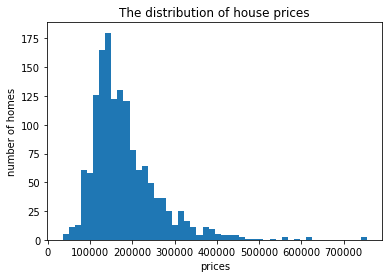

In [10]:
# histogram of SalePrice
# bins set to 50 to show variability
plt.hist(df_houseprices.SalePrice, bins = 50)
plt.title("The distribution of house prices")
plt.xlabel("prices")
plt.ylabel("number of homes")
plt.show()

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df_houseprices['SalePrice'].skew())
print("Kurtosis: %f" % df_houseprices['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The house prices distribution seem to be skewed to the right. The skewness and Kurtosis values of 1.88 and 6.54, respectively, support that this data is heavily skewed to the right. 

### 1.2.1 SalePrice vs Dates
Let's see how our target relates with other features.

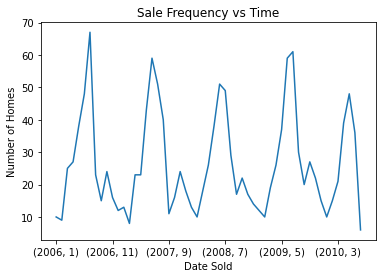

In [12]:
# Sale frequency vs YrSold and MoSold ... both grouped
df_houseprices.groupby(['YrSold', 'MoSold'])['SalePrice'].count().plot()
plt.title("Sale Frequency vs Time")
plt.xlabel("Date Sold")
plt.ylabel("Number of Homes")
plt.show()

- The dates of homes sold range from January 2006 to July 2010. 
- As one would expect from anecdotal information, the frequency of sales increase in the spring/summer months. Each season is followed up with a secondary, less active peak.

### 1.2.2 SalePrice vs Home Size (GrLivArea)

Text(0.5, 1.0, 'Correlation with SalePrice: 0.7086')

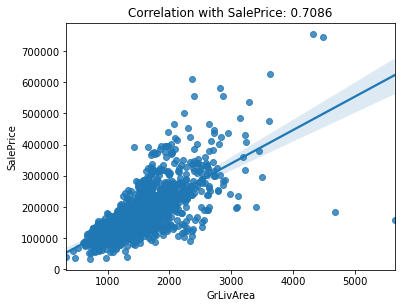

In [13]:
# SalePrice vs Size scatter plot
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(231); sns.regplot(x='GrLivArea', y='SalePrice', data=df_houseprices)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df_houseprices.GrLivArea.corr(df_houseprices['SalePrice'])))

This graph suggests that larger homes are more expensive than smaller homes, which is a common instinct for many home shoppers. Since this is not a perfect 1 to 1 correlation (R-square of 0.708), we can expect there are other features that influence the home price.

We compared price to a couple common variables but that would take us forever to go 1-by-1 like this. 
Let's make a quick pair of lists of numeric and non-numeric features and speed up this process.

In [14]:
num_cols = df_houseprices.select_dtypes(['int64', 'float64']).columns
print("The number of numerical columns is {}".format(len(num_cols)))

non_numeric_columns = df_houseprices.select_dtypes(['object']).columns
print("The number of NON-numeric columns is {}".format(len(non_numeric_columns)))

The number of numerical columns is 38
The number of NON-numeric columns is 43


### 1.2.3 SalePrice vs Categorical Features
How does our target relate with categorical (non-numeric) data?

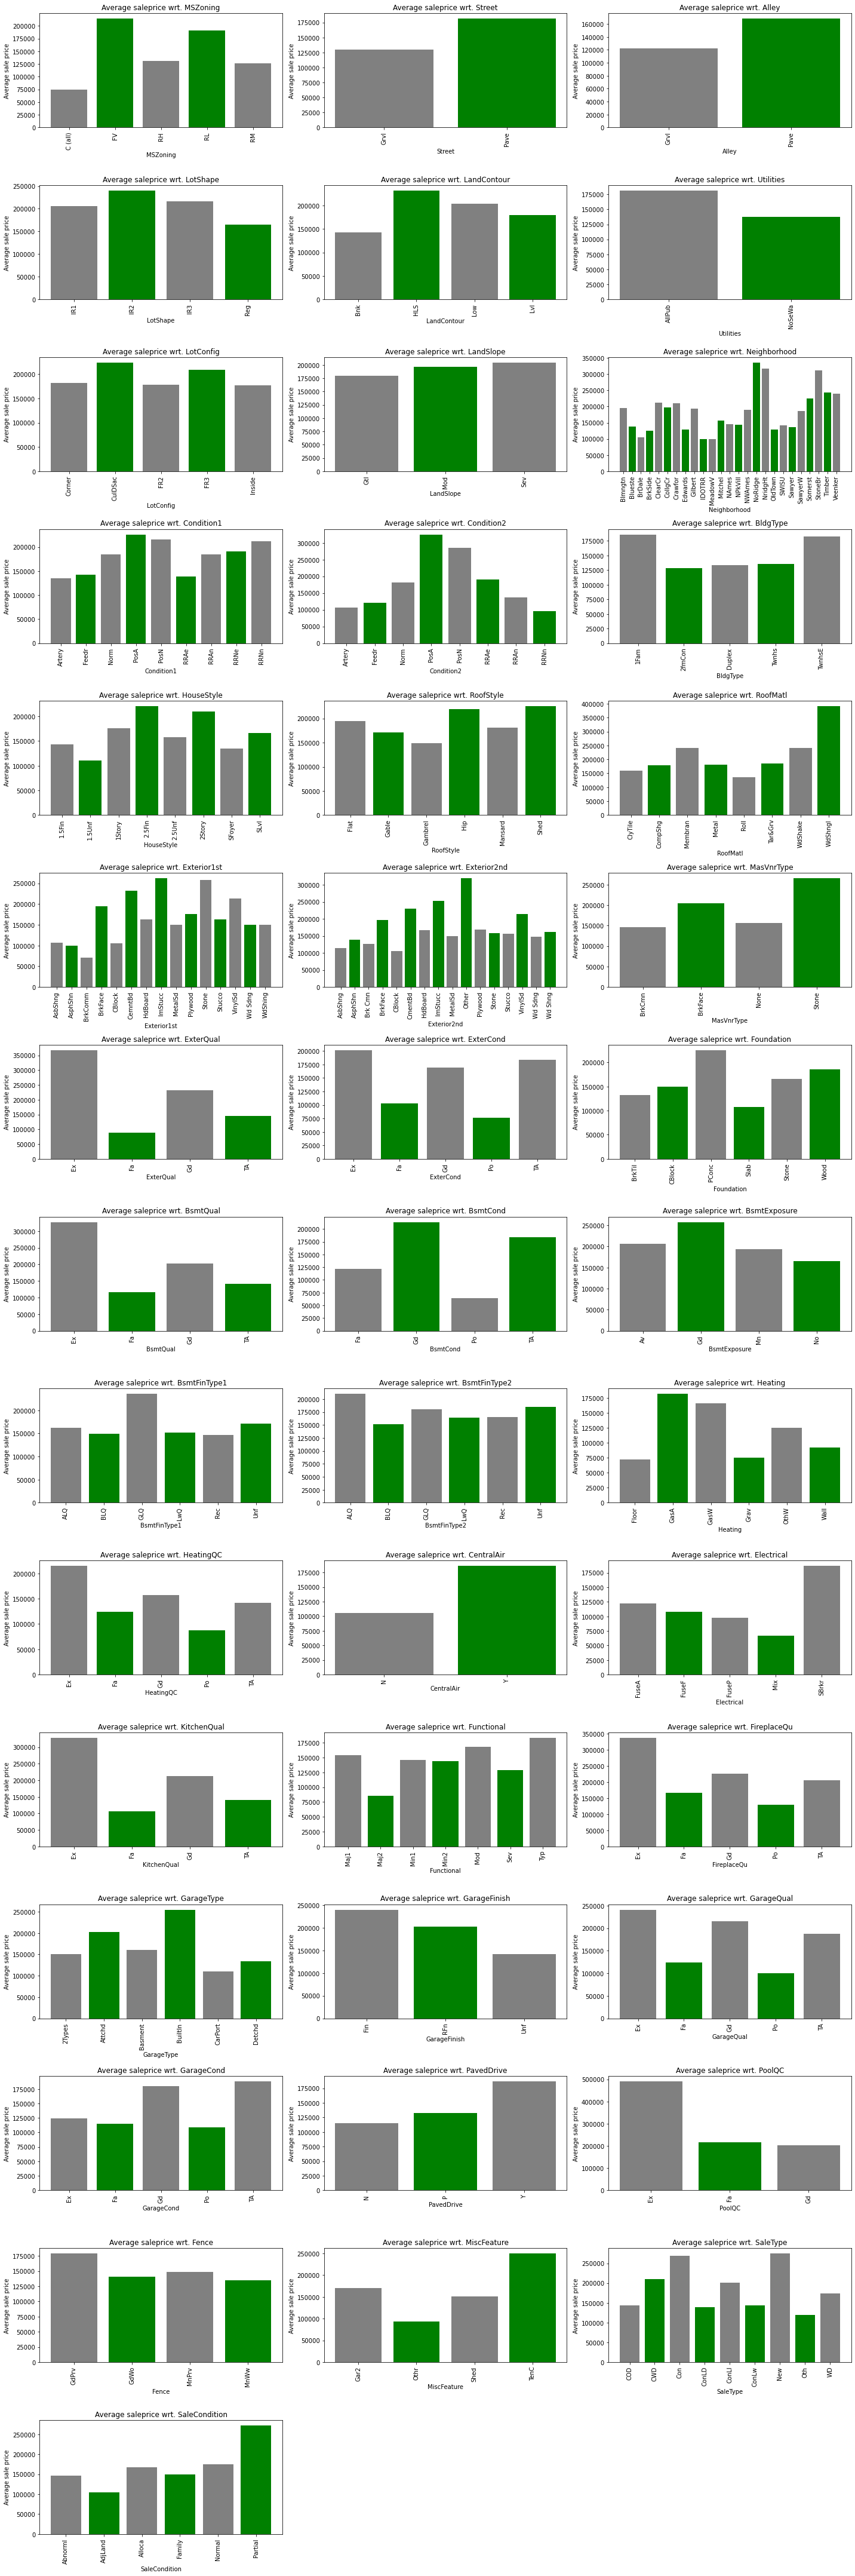

In [15]:
# for loop 
plt.figure(figsize=(20,60))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(15,3,index+1)
    plt.bar(df_houseprices.groupby(column)["SalePrice"].mean().index, df_houseprices.groupby(column)["SalePrice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

- The above suite of graphs represent the average sale price against each category. 
- Price seems to be impacted by neighborhoods. This might be useful to those new to the area.
- Homes with central air seem to have higher prices on average than homes without central air.
- HouseStyle appears to have some impact to price as well.

Let's dig into a few categorical variables and see if we can learn anything new.

### 1.2.4 SalePrice vs Overall Quality

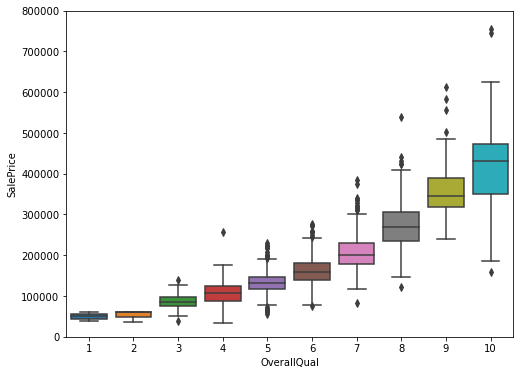

In [16]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- Overall quality seems to have strong relationship with sale price. 
- The average, base, and ceiling of house prices go up in general with each higher quality rank.
- This feature may be important to home buyers to support whether they are getting a good value for their purchase.
- Conversely, home sellers can use this information to support their asking price.

### 1.2.5 SalePrice vs Neighborhood

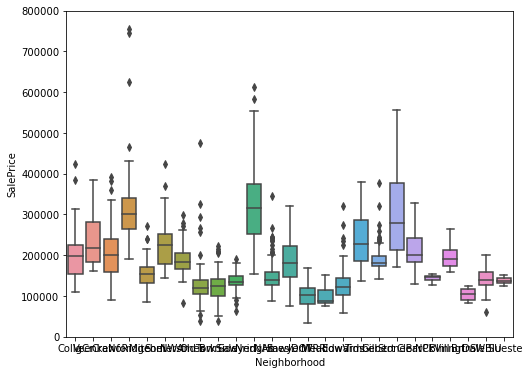

In [17]:
#box plot Neighborhood/saleprice
var = 'Neighborhood'
data = pd.concat([df_houseprices['SalePrice'], df_houseprices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

- This graph might look random to most people. However, if we're trying to help someone focus in areas in their price range, then we can use this information as a good starting point. 
- We can also deduce bargains in a given neighborhood.

### 1.2.6 SalePrice Correlation Plot

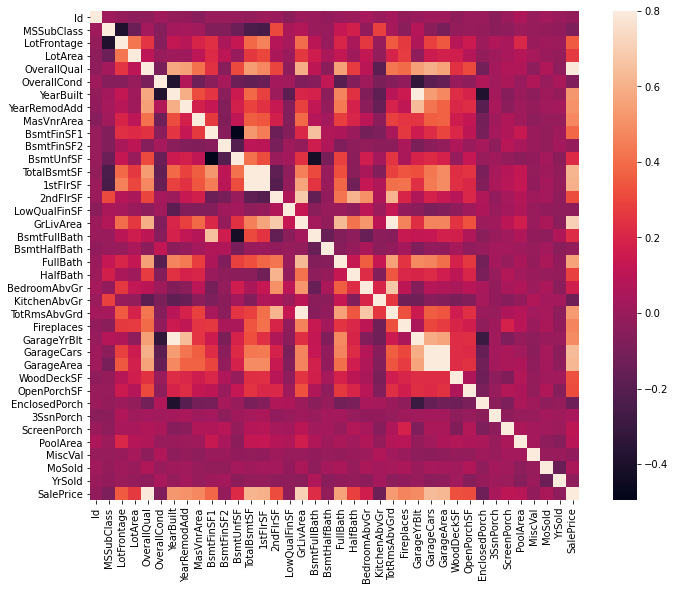

In [18]:
#correlation matrix
corrmat =  df_houseprices.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- This heatmap represents the correlation matrix of numeric data.
- Brighter colors indicate higher correlation coefficents and the cooler colors indicate lower correlation coefficients.
- Take note of brightest colors: GarageYrBuilt-YearBuilt; TotalBsmtSF-1stFlrSF; TotRmsAbvGrd-GrLivingArea; and SalePrice-OverallQual
- These variable pairs appear to be experiencing strong, colinear relationships. This will be something to be aware of when selecting features of importance further down the work flow.

Pairplots can help us visualize bivariate relationships, which is helpful to identify multi-colinearity.

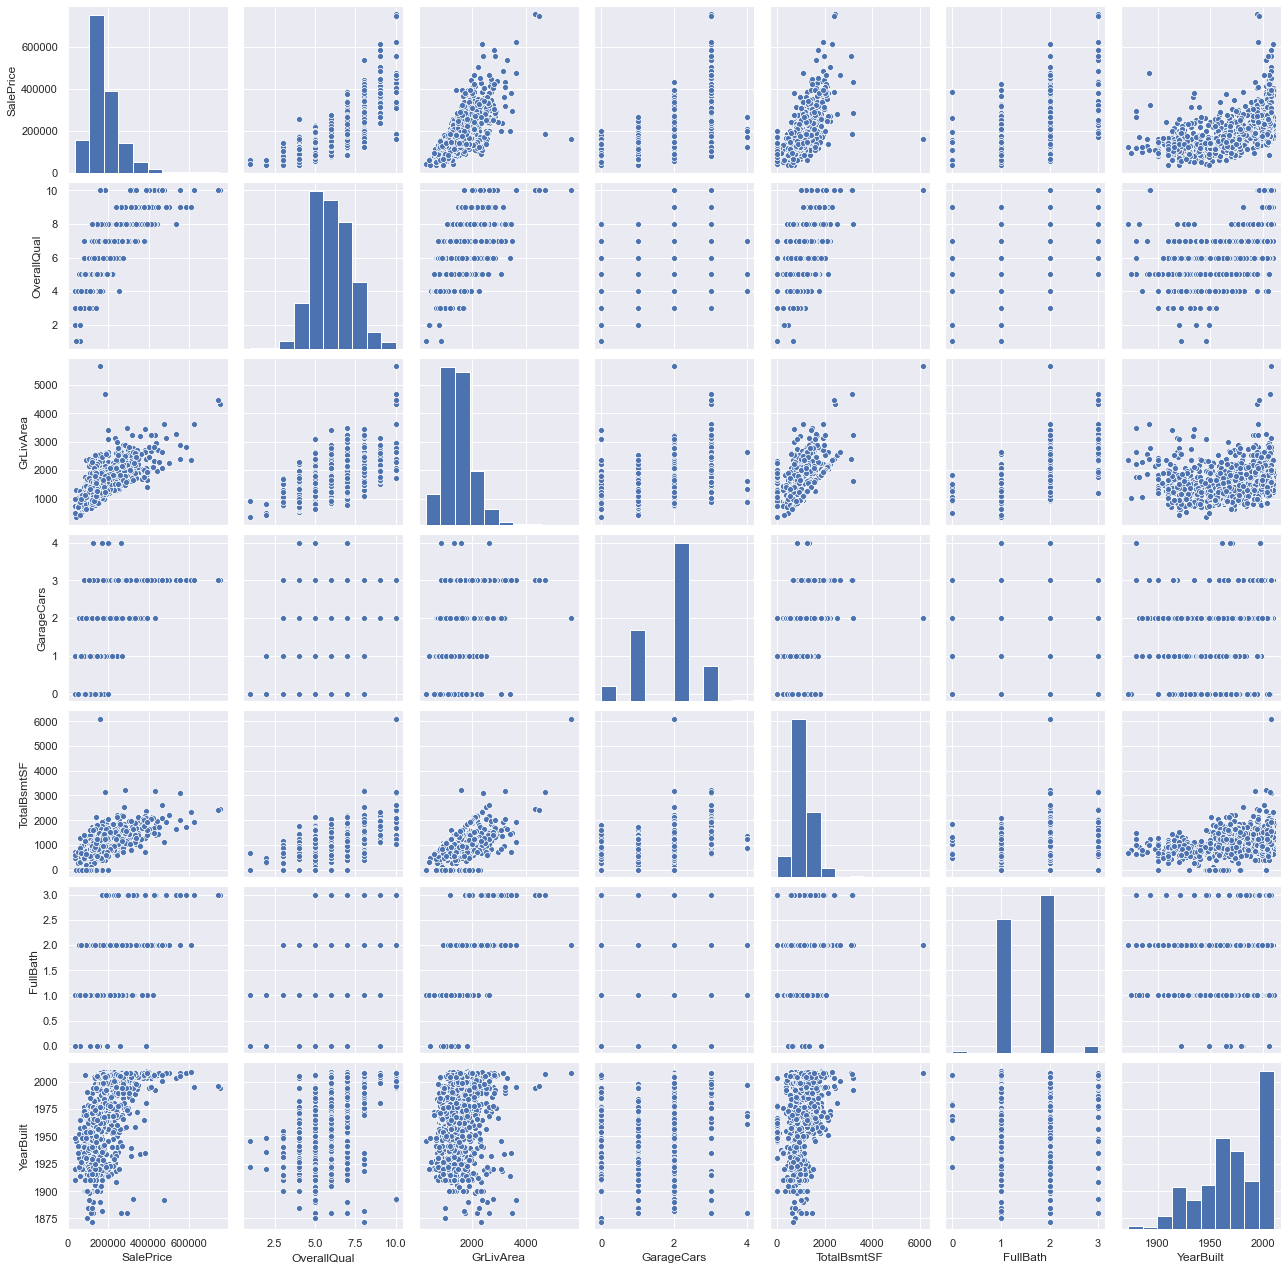

In [19]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_houseprices[cols], size = 2.5)
plt.show();

- These features have positive relationships with SalePrice. 
- Features like GarageCars and OverallQual loosely correlate but the general trend is still positive.
- Pay close attention to TotalBsmtSF vs GrLivArea. There are bounding dots that are strongly lined up. Thinking about this further, it's not typical for the basement to cover a larger area than the main home. In the case of upward line, we can deduce that the basement was exactly the same size in area as the main home. Where the line of dots is flat on the x-axis, it is likely that these homes did not have a basement, so the basement sf was reported as zero.
- OverQual appears to have positive relationships with other features, in addition to SalePrice. This could raise a flag for multicolinearity potential.

## 2. Nulls

One of the insights we learned about the data is that nulls exist. Let's explore them and treat them accordingly.

In [20]:
# create new dataframe to maintain original version
df_houseprices_2 = df_houseprices.copy()

First thing to do is examine where the nulls exist. The following code breaks down the total and percentage of nulls by feature.

In [21]:
# Count how many nulls there are per column
total_nulls = df_houseprices_2.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

# Observe the percentage of nulls in each column
percent_nulls = df_houseprices_2.isna().sum()* 100 / len(df_houseprices_2)
percent_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)
print('------------------------\npercent nulls per column')
print(percent_nulls)

total nulls per column
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope

Good thing we didn't just try and remove all nulls at the beginning! The largest 4 values are missing 80-99.5% of data. Imputing such a large chunk of information won't likely result in anything valid and removing all nulls would leave us with hardly any data at all. Let's ditch these variables. <br> 

In [22]:
# dropping columns with high percentage of nulls
df_houseprices_2 = df_houseprices_2.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

Next, let's explore these nulls a bit further so we can fix them appropriately.

In [23]:
# make unique columns for object and numeric dtypes
num_cols = df_houseprices_2.select_dtypes(exclude = object).columns
word_cols = df_houseprices_2.select_dtypes(include = object).columns

In [24]:
# Find columns which has null values and data type object
fill_na_word_columns = []
for column_name in df_houseprices_2.columns:
    if df_houseprices_2[column_name].isnull().any() and df_houseprices_2[column_name].dtype==object:
        fill_na_word_columns.append(column_name)
        
print('Object columns with nulls: '+ str(fill_na_word_columns))

Object columns with nulls: ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [25]:
# Find columns which has null values and data numerical data
fill_na_numeric_columns = []
for column_name in num_cols:
    if df_houseprices_2[column_name].isnull().any():
        fill_na_numeric_columns.append(column_name)
        
print('Numeric columns with nulls: '+ str(fill_na_numeric_columns))

Numeric columns with nulls: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


There are WAY fewer numeric columns with nulls than object data types. Let's start with the numeric columns since there are only 3.

In [26]:
df_houseprices_2[['LotFrontage', 'LotConfig', 'LotArea', 'MasVnrArea', 'MasVnrType', 'GarageYrBlt','GarageCars']].sample(20)

LotFrontage LotConfig  LotArea  MasVnrArea MasVnrType  GarageYrBlt  \
541           nan       FR2    11000      72.000    BrkFace     2000.000   
509        80.000    Corner     9600     132.000    BrkFace     1959.000   
493        70.000    Inside     7931       0.000       None     1964.000   
1409       46.000   CulDSac    20544     123.000    BrkFace     1986.000   
246        69.000    Inside     9142       0.000       None     1910.000   
1291       21.000    Inside     1680     268.000    BrkFace     1972.000   
698        65.000    Inside     8450       0.000       None     1973.000   
1192       60.000    Inside     9600       0.000       None     1925.000   
973        95.000    Corner    11639         nan        NaN     2007.000   
1225       65.000    Inside    10482      63.000    BrkFace     1958.000   
1012       55.000    Inside    10592       0.000       None     1923.000   
997           nan    Inside    11717     571.000    BrkFace     1970.000   
1181       64.000    Inside     5587     186.000      Stone     2008.000   
1038       21.000    Inside     1533       0.000       None          nan   
1443          nan    Inside     8854       0.000       None     1916.000   
761        60.000       FR2     6911       0.000       None     1965.000   
465           nan    Inside     3072      18.000    BrkFace     2004.000   
938        73.000    Inside     8760       0.000       None     2006.000   
497        60.000    Inside     9120       0.000       None     1925.000   
1120       59.000    Inside     8263       0.000       None     1920.000   

      GarageCars  
541            3  
509            1  
493            1  
1409           2  
246            1  
1291           1  
698            1  
1192           1  
973            2  
1225           1  
1012           1  
997            2  
1181           2  
1038           0  
1443           1  
761            2  
465            2  
938            3  
497            1  
1120           1

- LotFrontage doesn't appear to follow much of trend based on the lot configuration or area.
- MasVnrArea and GarageYrBlt tell a different story. These both display nulls when the condition does not exist. In this case, we will simply replace the nulls with zeros.

Let's take a closer look with LotFrontage values to determine how we will fill in these nulls.

In [27]:
# Explore LotFrontage
# Continuous variable... is there any relationship with neighborhood?
display(df_houseprices_2.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count']))

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn           47.143 43.000    14
Blueste           24.000 24.000     2
BrDale            21.562 21.000    16
BrkSide           57.510 52.000    51
ClearCr           83.462 80.000    13
CollgCr           71.683 70.000   126
Crawfor           71.805 74.000    41
Edwards           68.217 65.500    92
Gilbert           79.878 65.000    49
IDOTRR            62.500 60.000    34
MeadowV           27.800 21.000    15
Mitchel           70.083 73.000    36
NAmes             76.462 73.000   186
NPkVill           32.286 24.000     7
NWAmes            81.289 80.000    45
NoRidge           91.879 91.000    33
NridgHt           81.882 88.500    76
OldTown           62.789 60.000   109
SWISU             58.913 60.000    23
Sawyer            74.438 71.000    48
SawyerW           71.500 66.500    50
Somerst           64.667 73.500    78
StoneBr           62.700 61.500    20
Timber            80.133 85.000    30
Veenker           59.714 68.000     7

- Grouped by Neighborhood
- The mean and median are quite close together. 
- Let's fill the "LotFrontage" nulls in with median to keep the numeric values a similar format to the rest of the entries for this column.
- The other 2 numeric columns represent missing features in the respective properties. We'll replace these nulls with "0" to indicate the feature didn't exist.

- Conversely, the categorical variables represent conditional observations. The nulls are not being treated as reporting errors but rather lacking the features necessary to describe. Therefore, "None" will replace the nulls.

In [28]:
df_houseprices_2["LotFrontage"] = df_houseprices_2.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [29]:
# fill nulls with zeros for GarageYrBlt and MasVnrArea
for col in fill_na_numeric_columns:
    df_houseprices_2[col].fillna(0, inplace=True)

In [30]:
# Fill "None" in object columns to replace nulls
for col_name in fill_na_word_columns:
    df_houseprices_2[col_name].fillna("NONE", inplace=True)

## 3. EDA - Numerical Data

Since we know we're going to evaluate clustering models, the scope of the data should include enough variability to help us classify clusters based on similarities within the features. Descriptive columns that are primarily 1 value will not provide much value when compared to higher variability of the other columns. Let's dive down into the data to see if we have any columns that fit this description and remove them.

In [31]:
display(df_houseprices_2.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1460.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.200  10516.828        6.099        5.575   
std    421.610      42.301       22.432   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
10%    146.900      20.000       48.000   5000.000        5.000        5.000   
25%    365.750      20.000       60.000   7553.500        5.000        5.000   
50%    730.500      50.000       70.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
90%   1314.100     120.000       92.000  14381.700        8.000        7.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count   1460.000      1460.000    1460.000    1460.000    1460.000   1460.000   
mean    1971.268      1984.866     103.117     443.640      46.549    567.240   
std       30.203        20.645     180.731     456.098     161.319    441.867   
min     1872.000      1950.000       0.000       0.000       0.000      0.000   
10%     1924.900      1950.000       0.000       0.000       0.000     74.900   
25%     1954.000      1967.000       0.000       0.000       0.000    223.000   
50%     1973.000      1994.000       0.000     383.500       0.000    477.500   
75%     2000.000      2004.000     164.250     712.250       0.000    808.000   
90%     2006.000      2006.000     335.000    1065.500     117.200   1232.000   
max     2010.000      2010.000    1600.000    5644.000    1474.000   2336.000   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000   
mean      1057.429  1162.627   346.992         5.845   1515.464         0.425   
std        438.705   386.588   436.528        48.623    525.480         0.519   
min          0.000   334.000     0.000         0.000    334.000         0.000   
10%        636.900   756.900     0.000         0.000    912.000         0.000   
25%        795.750   882.000     0.000         0.000   1129.500         0.000   
50%        991.500  1087.000     0.000         0.000   1464.000         0.000   
75%       1298.250  1391.250   728.000         0.000   1776.750         1.000   
90%       1602.200  1680.000   954.200         0.000   2158.300         1.000   
max       6110.000  4692.000  2065.000       572.000   5642.000         3.000   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count      1460.000  1460.000  1460.000      1460.000      1460.000   
mean          0.058     1.565     0.383         2.866         1.047   
std           0.239     0.551     0.503         0.816         0.220   
min           0.000     0.000     0.000         0.000         0.000   
10%           0.000     1.000     0.000         2.000         1.000   
25%           0.000     1.000     0.000         2.000         1.000   
50%           0.000     2.000     0.000         3.000         1.000   
75%           0.000     2.000     1.000         3.000         1.000   
90%           0.000     2.000     1.000         4.000         1.000   
max           2.000     3.000     2.000         8.000         3.000   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count      1460.000    1460.000     1460.000    1460.000    1460.000   
mean          6.518       0.613     1868.740       1.767     472.980   
std           1.625       0.645      453.697       0.747     213.805   
min           2.000       0.000        0.000       0.000       0.000   
10%           5.000       0.000     1928.000       1.000     240.000   
25%           5.000       0.000     1958.000       1.000     334.500   
50%           6.000       1.000     1977.000       2.000     

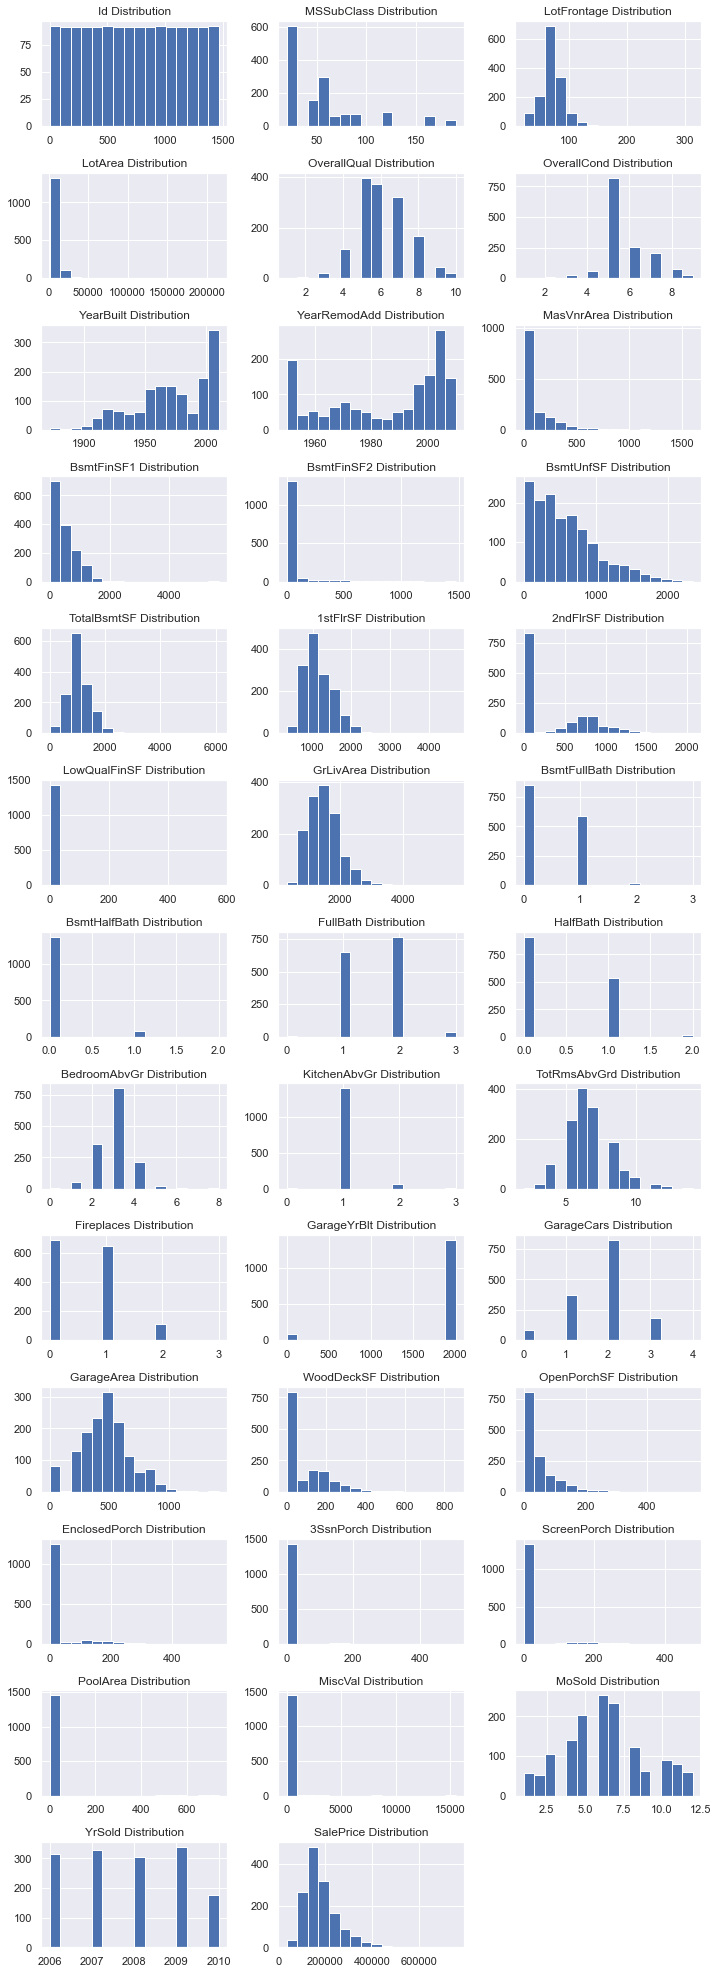

In [32]:
# Univariate visualization without having to manually plot each graph

def draw_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(10, 80))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=16,ax=ax)
        ax.set_title(var_name + " Distribution")
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_houseprices_2, num_cols, len(num_cols), 3)

There are a number of columns where the vast majority of data is a single value. Let's go ahead and remove them. <br> 

'BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'GarageCars', and 'GarageYrBlt' will be removed.

In [33]:
df_houseprices_3 = df_houseprices_2.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr', 
           'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'GarageCars', 'GarageYrBlt'],axis=1).copy()

## 3.1 EDA - Categorical Data

We'll repeat this method to remove categorical variables.

In [34]:
cat_cols = df_houseprices_3.select_dtypes(include='object').columns

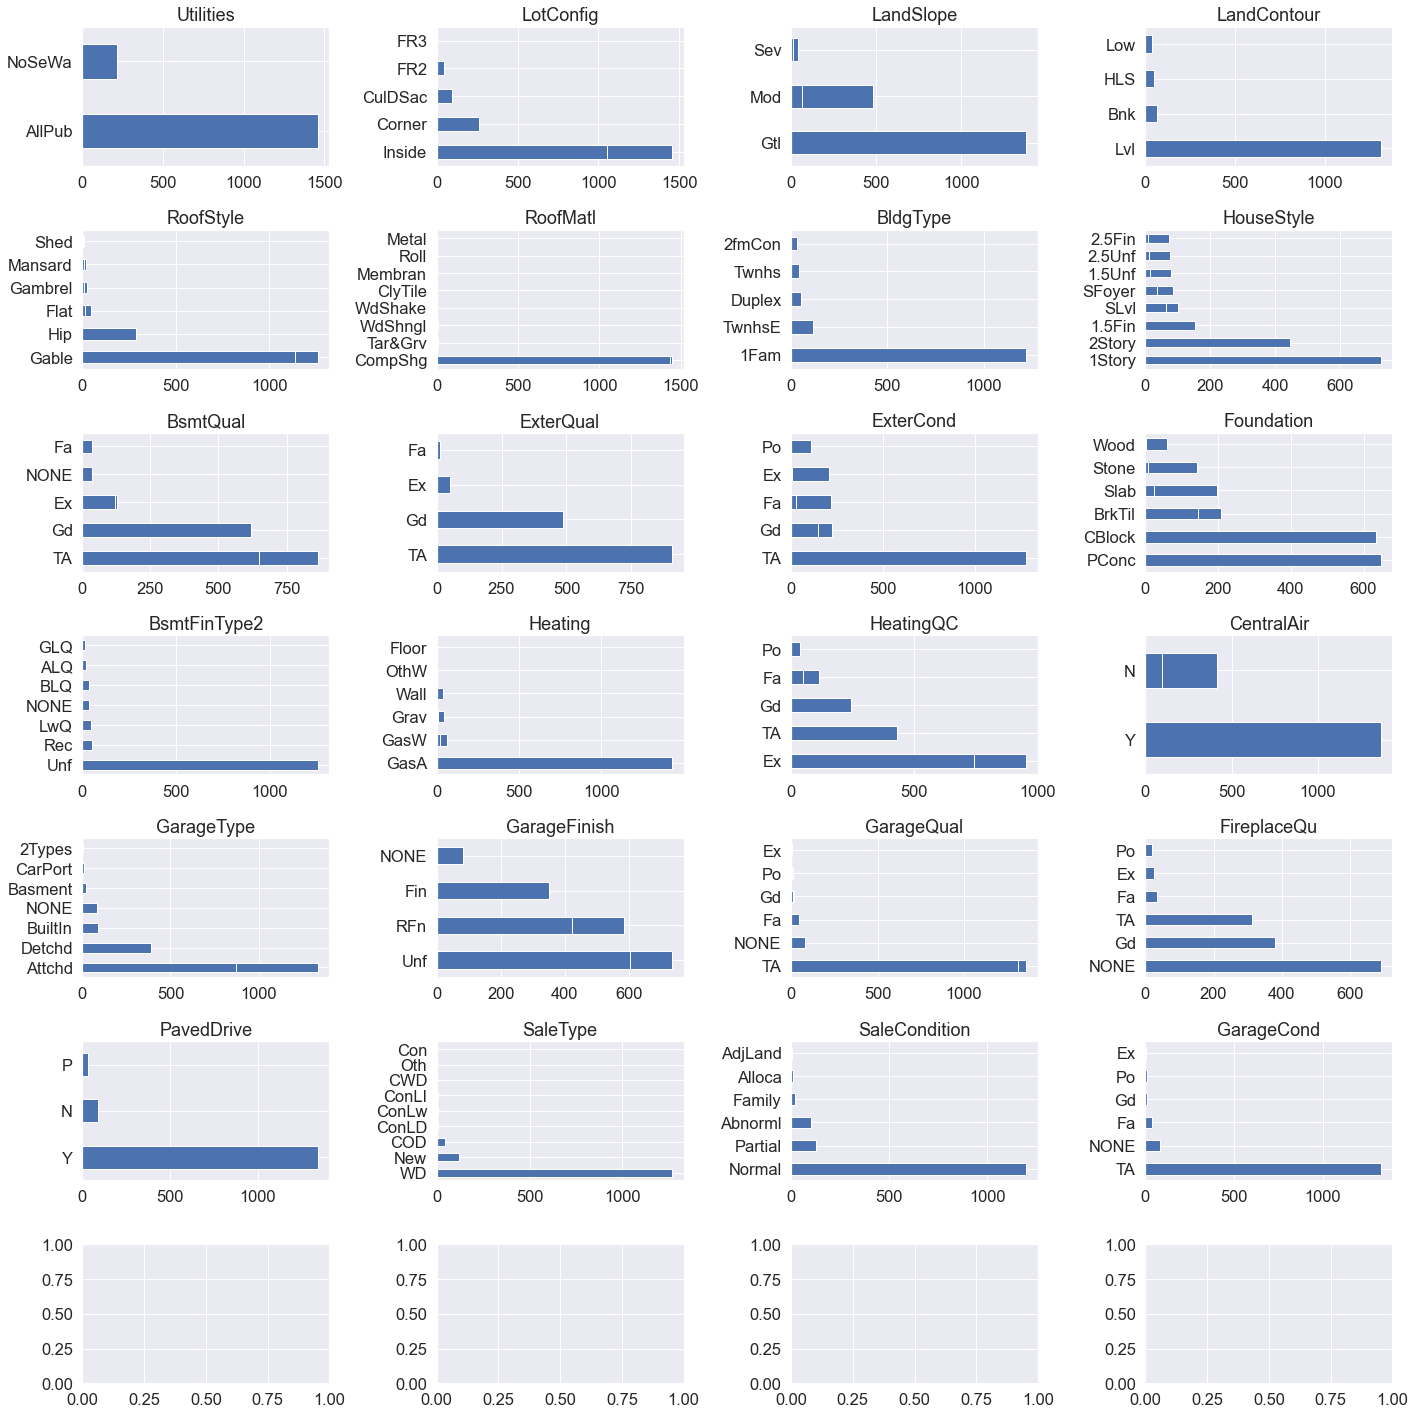

In [35]:
# bar plots of categorical variables
sns.set()

sns.set(font_scale=1.5)
n_row = 7
n_col = 4
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(cat_cols):
    pd.value_counts(df_houseprices_3[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()
plt.show()

'Utilities','LandSlope','Condition1','Condition2','BldgType','Street','RoofMatl','ExterCond','BsmtCond', 'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','MSZoning','SaleType','SaleCondition', 'LandContour', and 'BsmtFinType2' will be removed.

In [36]:
# dropping variables without meaningful distributions
df_houseprices_3 = df_houseprices_3.drop(['Utilities','LandSlope','Condition1','Condition2','BldgType','Street',
                                          'RoofMatl','ExterCond','BsmtCond', 'Heating','CentralAir','Electrical',
                                          'Functional','GarageQual','GarageCond','PavedDrive','MSZoning','SaleType',
                                          'SaleCondition', 'LandContour','BsmtFinType2'],axis=1)

## 4. Outliers


### 4.1 Univariate Analysis

Let's quickly run through the numeric columns using univariate methods. It's possible we may see large outliers in some variables. Outliers are also a bit tricky. We'll need to evaluate the data using univariate and bivariate methods before making a move we might regret.

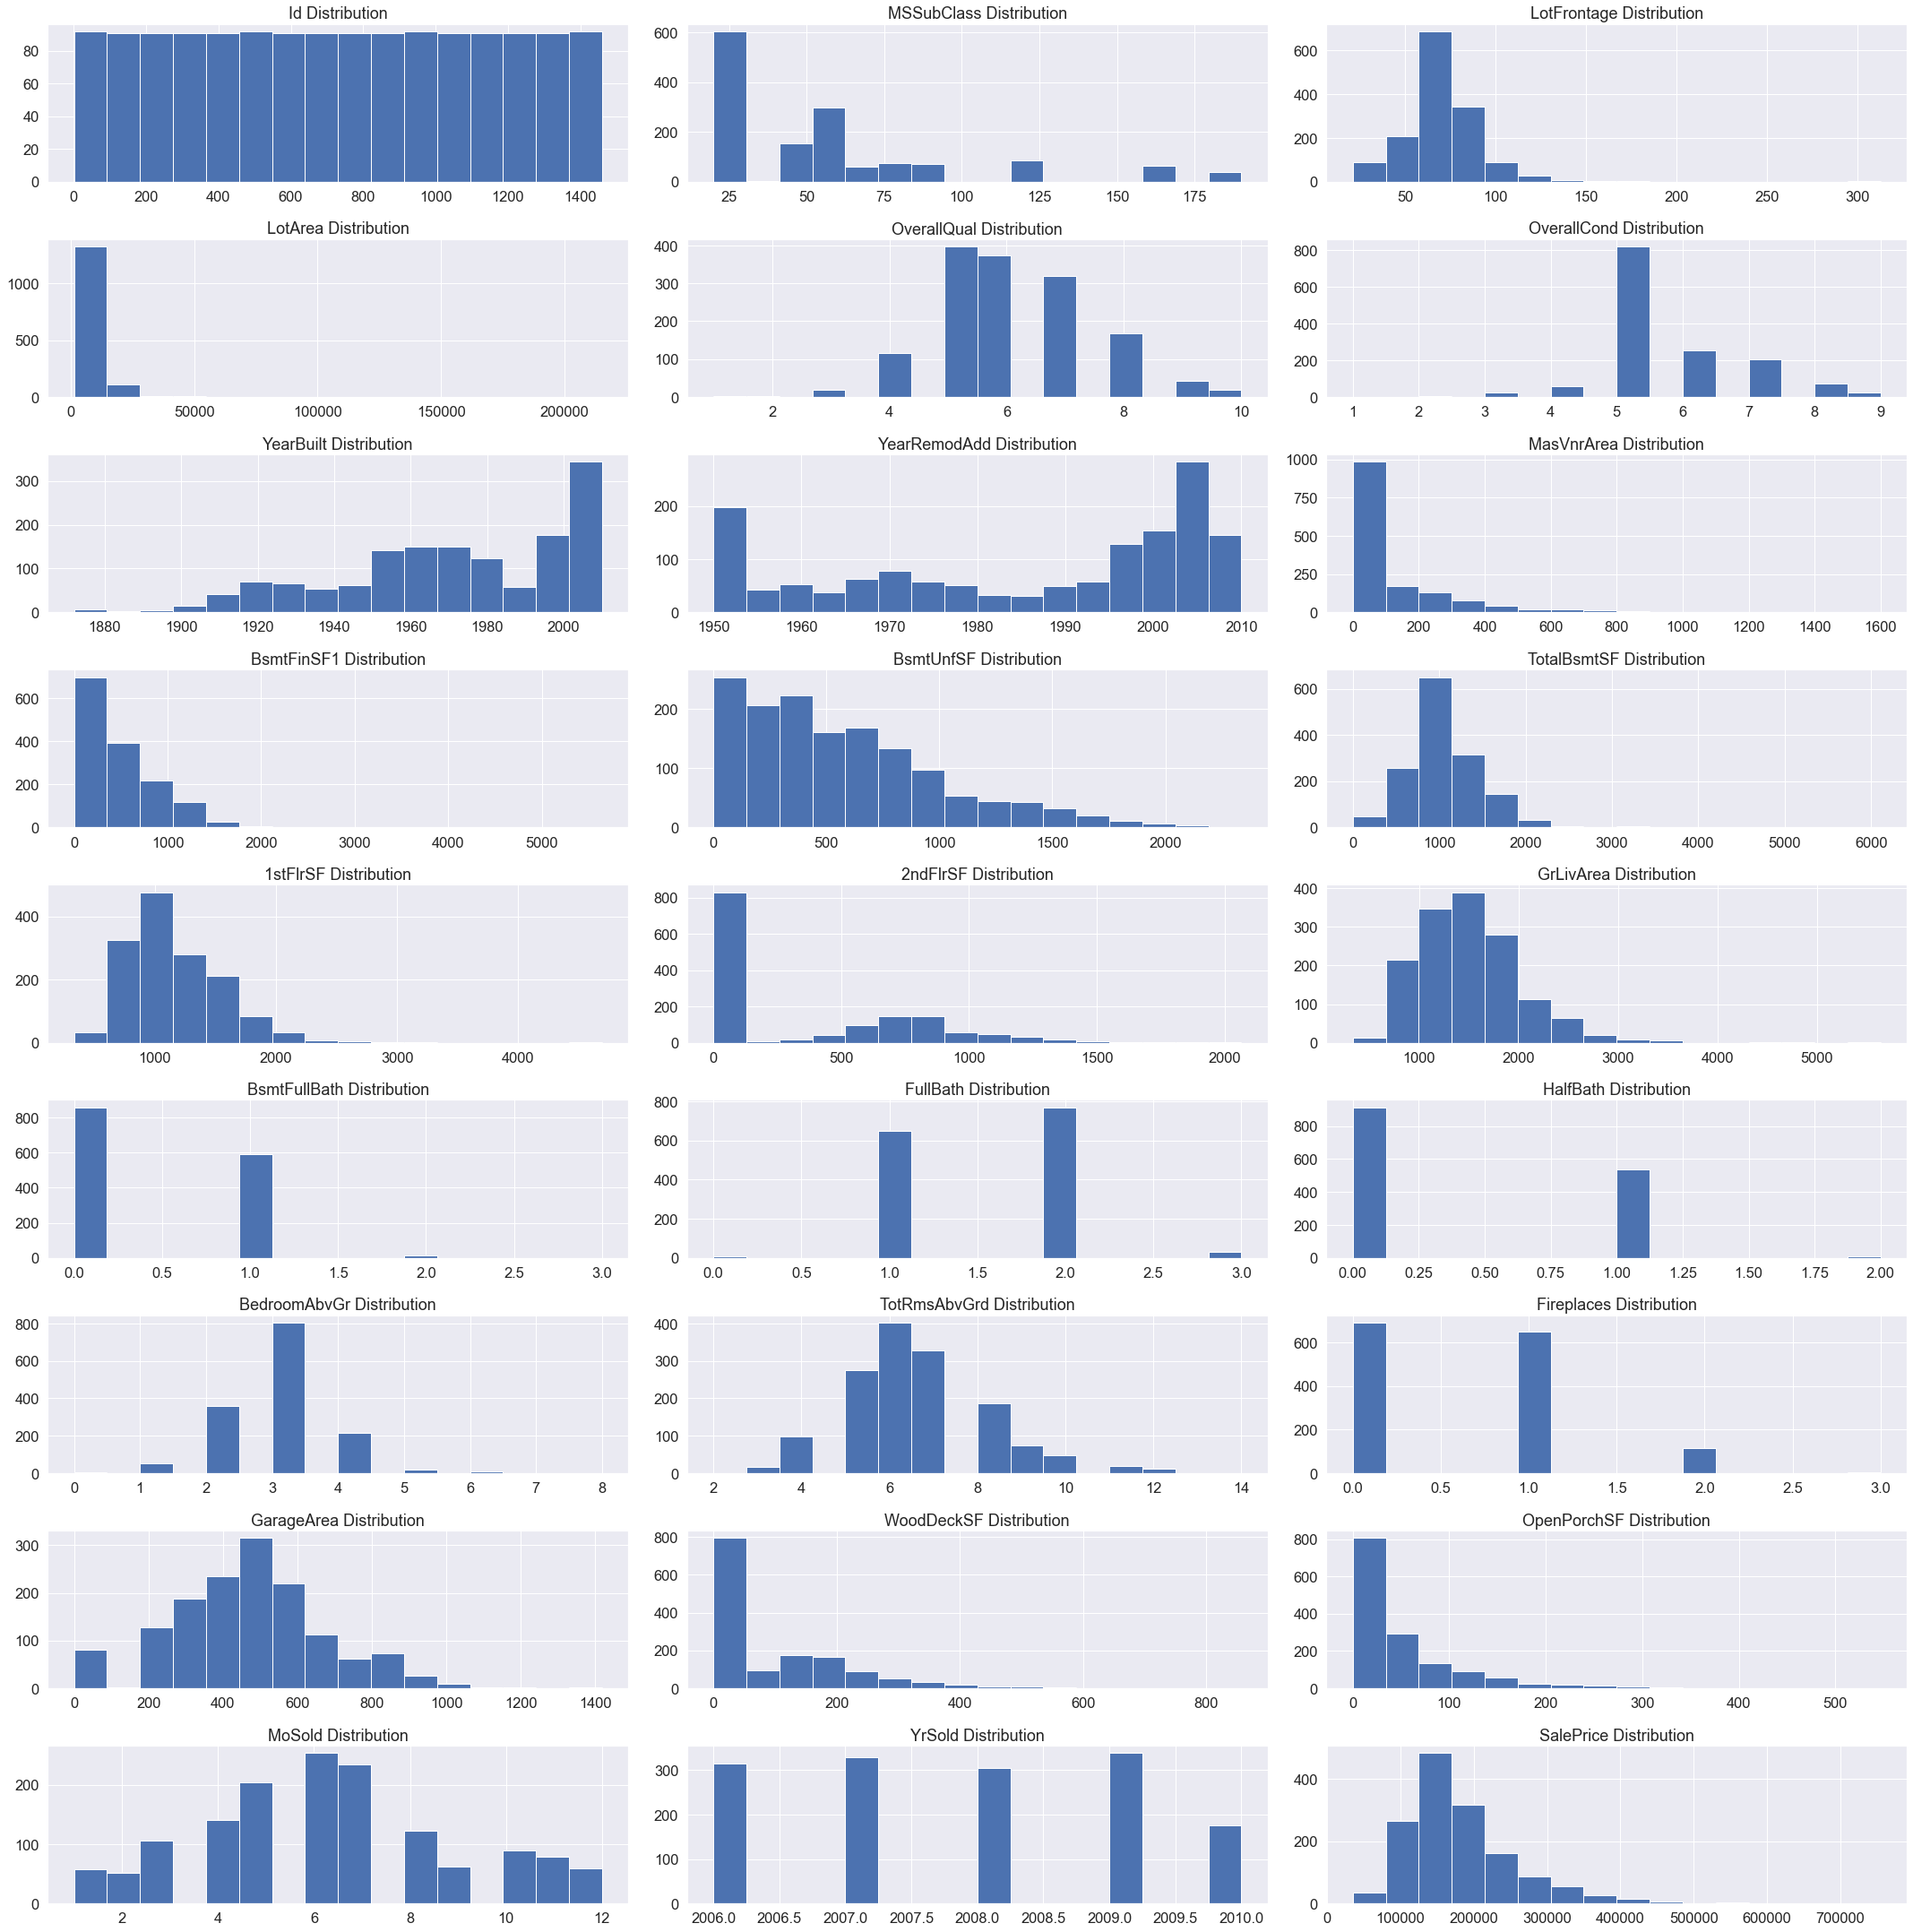

In [37]:
# make unique columns for object and numeric dtypes
num_cols = df_houseprices_3.select_dtypes(exclude = object).columns
word_cols = df_houseprices_3.select_dtypes(include = object).columns

# Univariate visualization without having to manually plot each graph

def draw_histograms(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(30, 90))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=16,ax=ax)
        ax.set_title(var_name + " Distribution")
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_houseprices_3, num_cols, len(num_cols), 3)

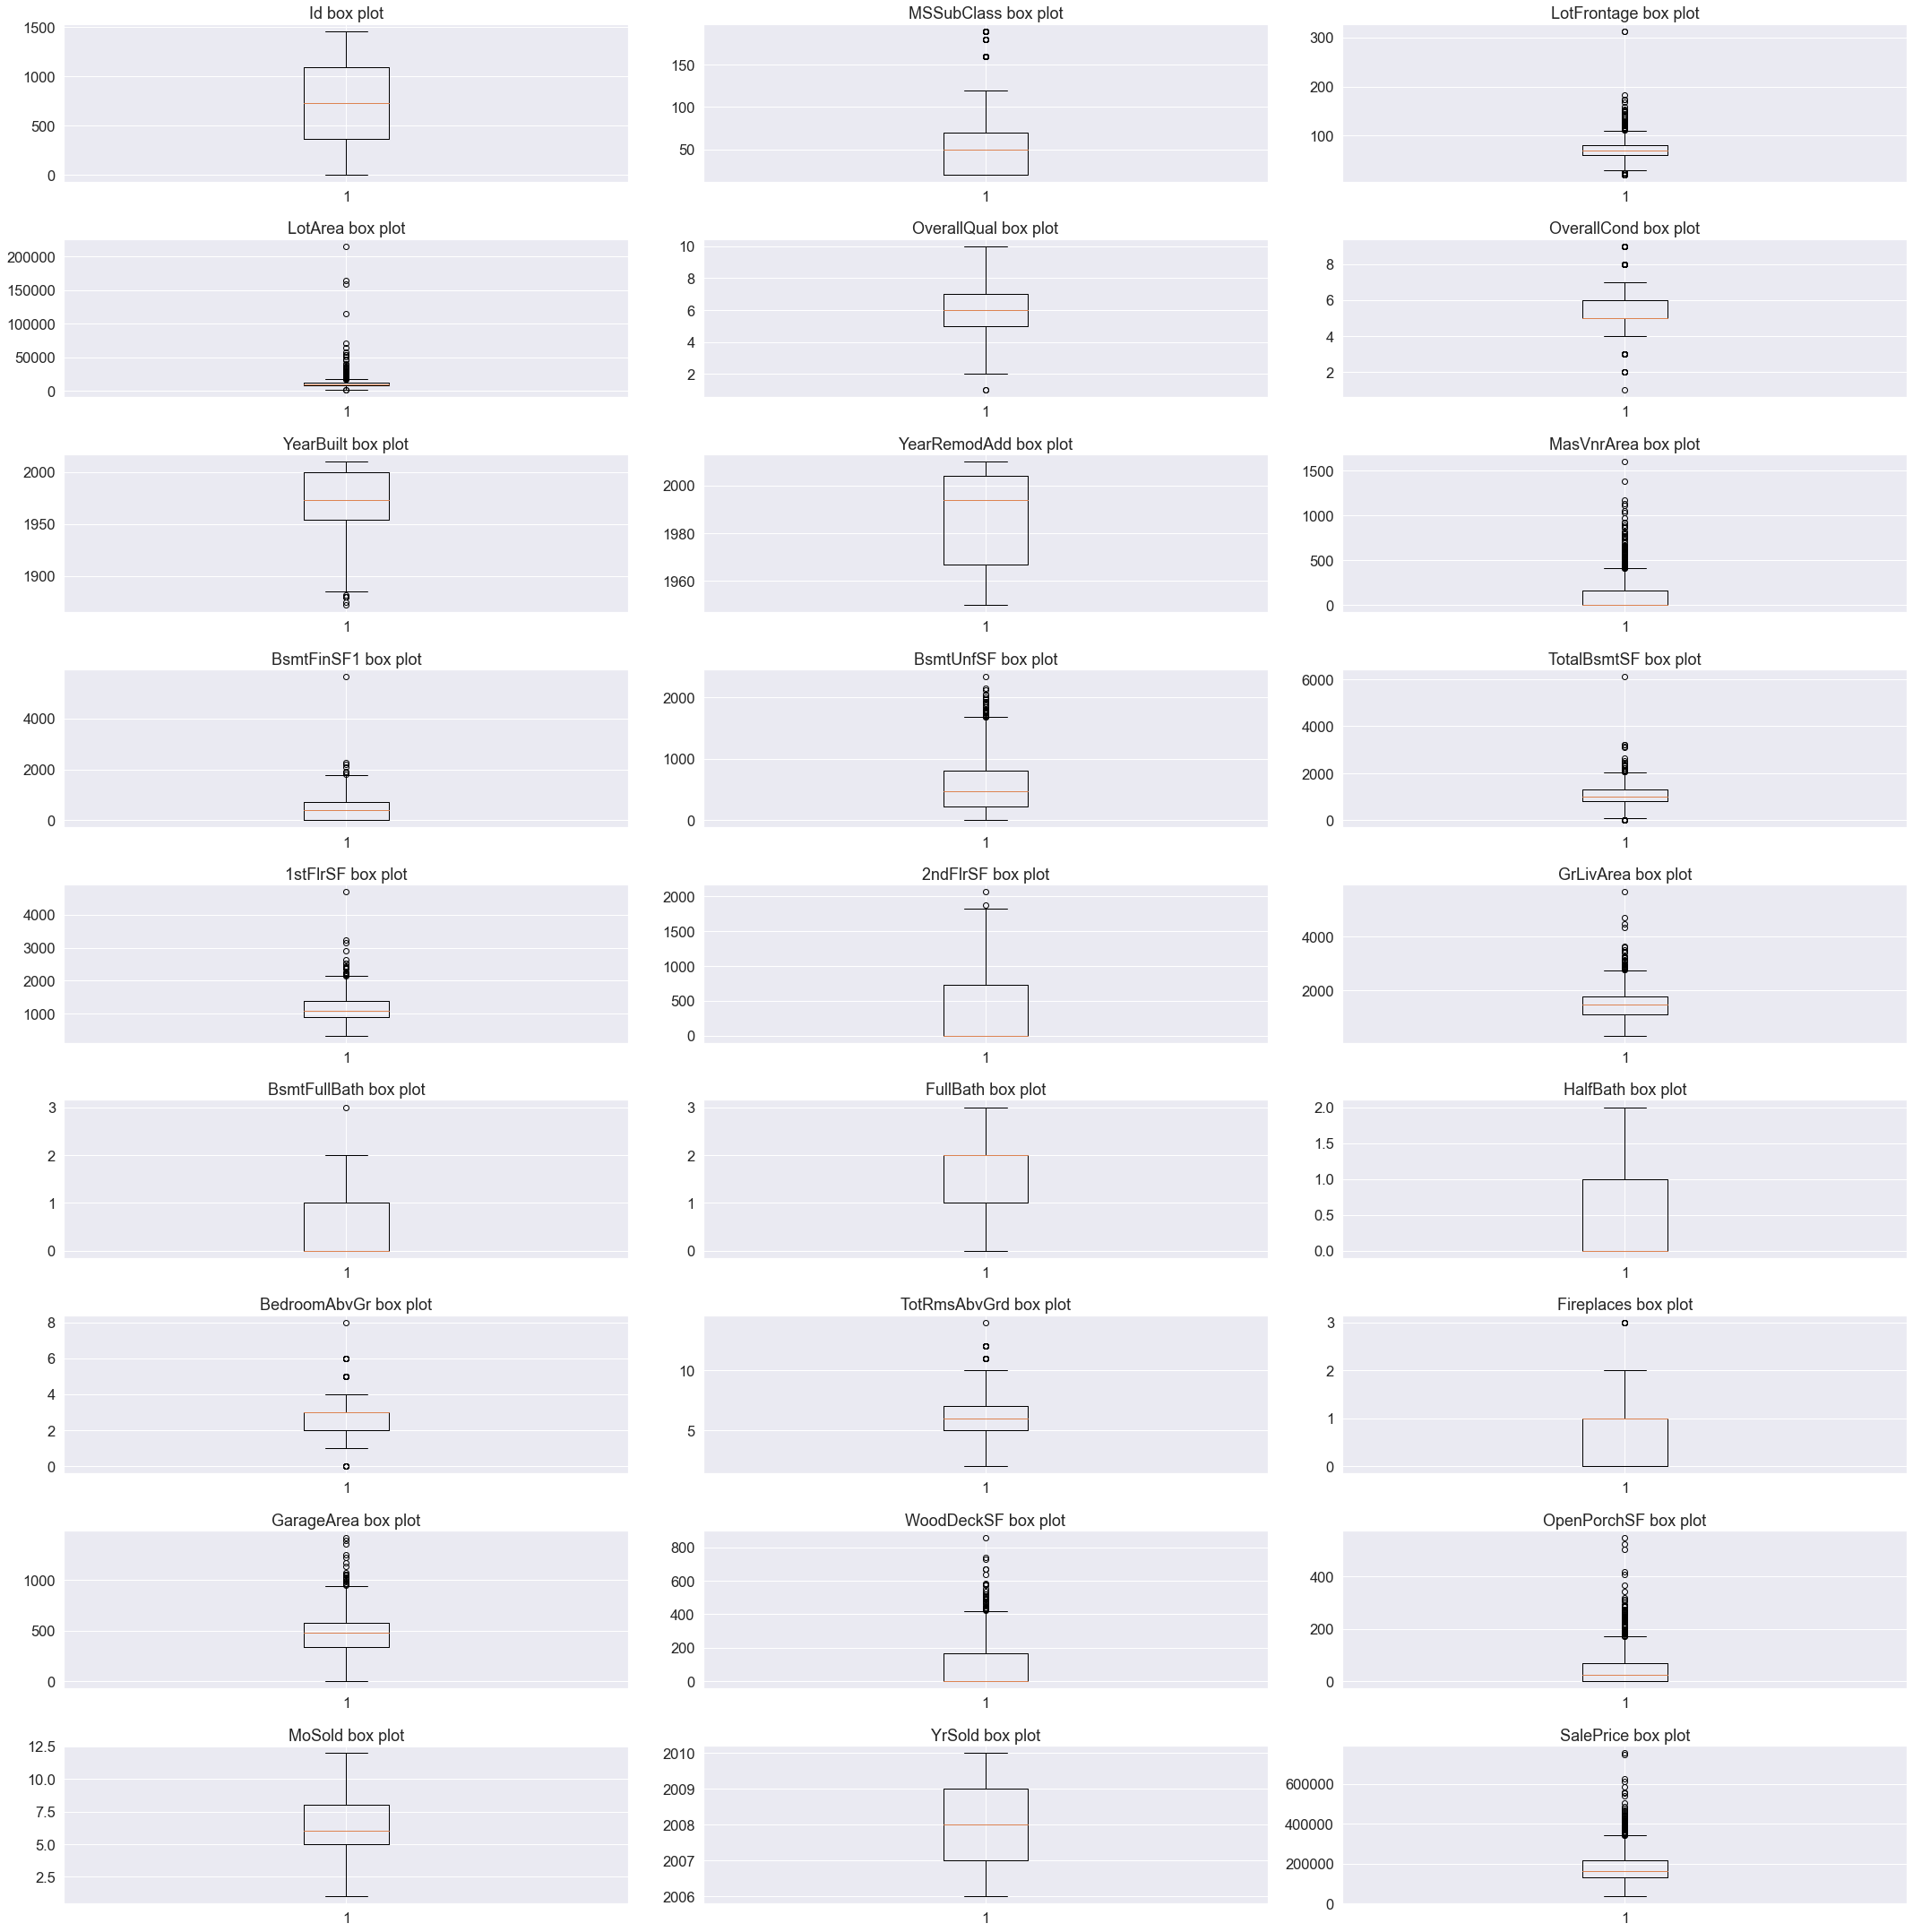

In [38]:
# box plots of to viualize outliers

def draw_box(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize =(30, 90))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.boxplot(df[var_name])
        ax.set_title(var_name + ' box plot')
    fig.tight_layout()
    plt.show()
    
draw_box(df_houseprices_3, num_cols, len(num_cols), 3)

In [39]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in num_cols:
    q75, q25 = np.percentile(df_houseprices_3[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df_houseprices_3[variable] > max_val) | 
                                                                                           (df_houseprices_3[variable] < min_val))[0])),len((np.where((df_houseprices_3[variable] > max_val) | 
                                                                                           (df_houseprices_3[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Id : 0 and 0.0
Number of outliers and percentage of it in MSSubClass : 103 and 5.183694011071967
Number of outliers and percentage of it in LotFrontage : 93 and 4.680422747861097
Number of outliers and percentage of it in LotArea : 69 and 3.4725717161550076
Number of outliers and percentage of it in OverallQual : 2 and 0.10065425264217413
Number of outliers and percentage of it in OverallCond : 125 and 6.290890790135883
Number of outliers and percentage of it in YearBuilt : 7 and 0.3522898842476095
Number of outliers and percentage of it in YearRemodAdd : 0 and 0.0
Number of outliers and percentage of it in MasVnrArea : 98 and 4.9320583794665325
Number of outliers and percentage of it in BsmtFinSF1 : 7 and 0.3522898842476095
Number of outliers and percentage of it in BsmtUnfSF : 29 and 1.4594866633115249
Number of outliers and percentage of it in TotalBsmtSF : 61 and 3.0699547055863112
Number of outliers and percentage of it in 1stFlrSF : 20 a

- At the surface, can see that there are some potential outliers. 
- Looking further, we can also acknowledge that some features don't have outliers as much as a lack of data (large count of zero values). So, anything reported as a positive value appears on the box plots as an outlier.
- Some of these outliers also don't look extreme and many would be best left alone. 
- Before making any changes, lets review the variables in another way... bivariate analysis.

### 4.2 Bivariate Analysis

We saw that many features might have outliers using univariate detection methods. What can we determine when we crossplot these features against the target?

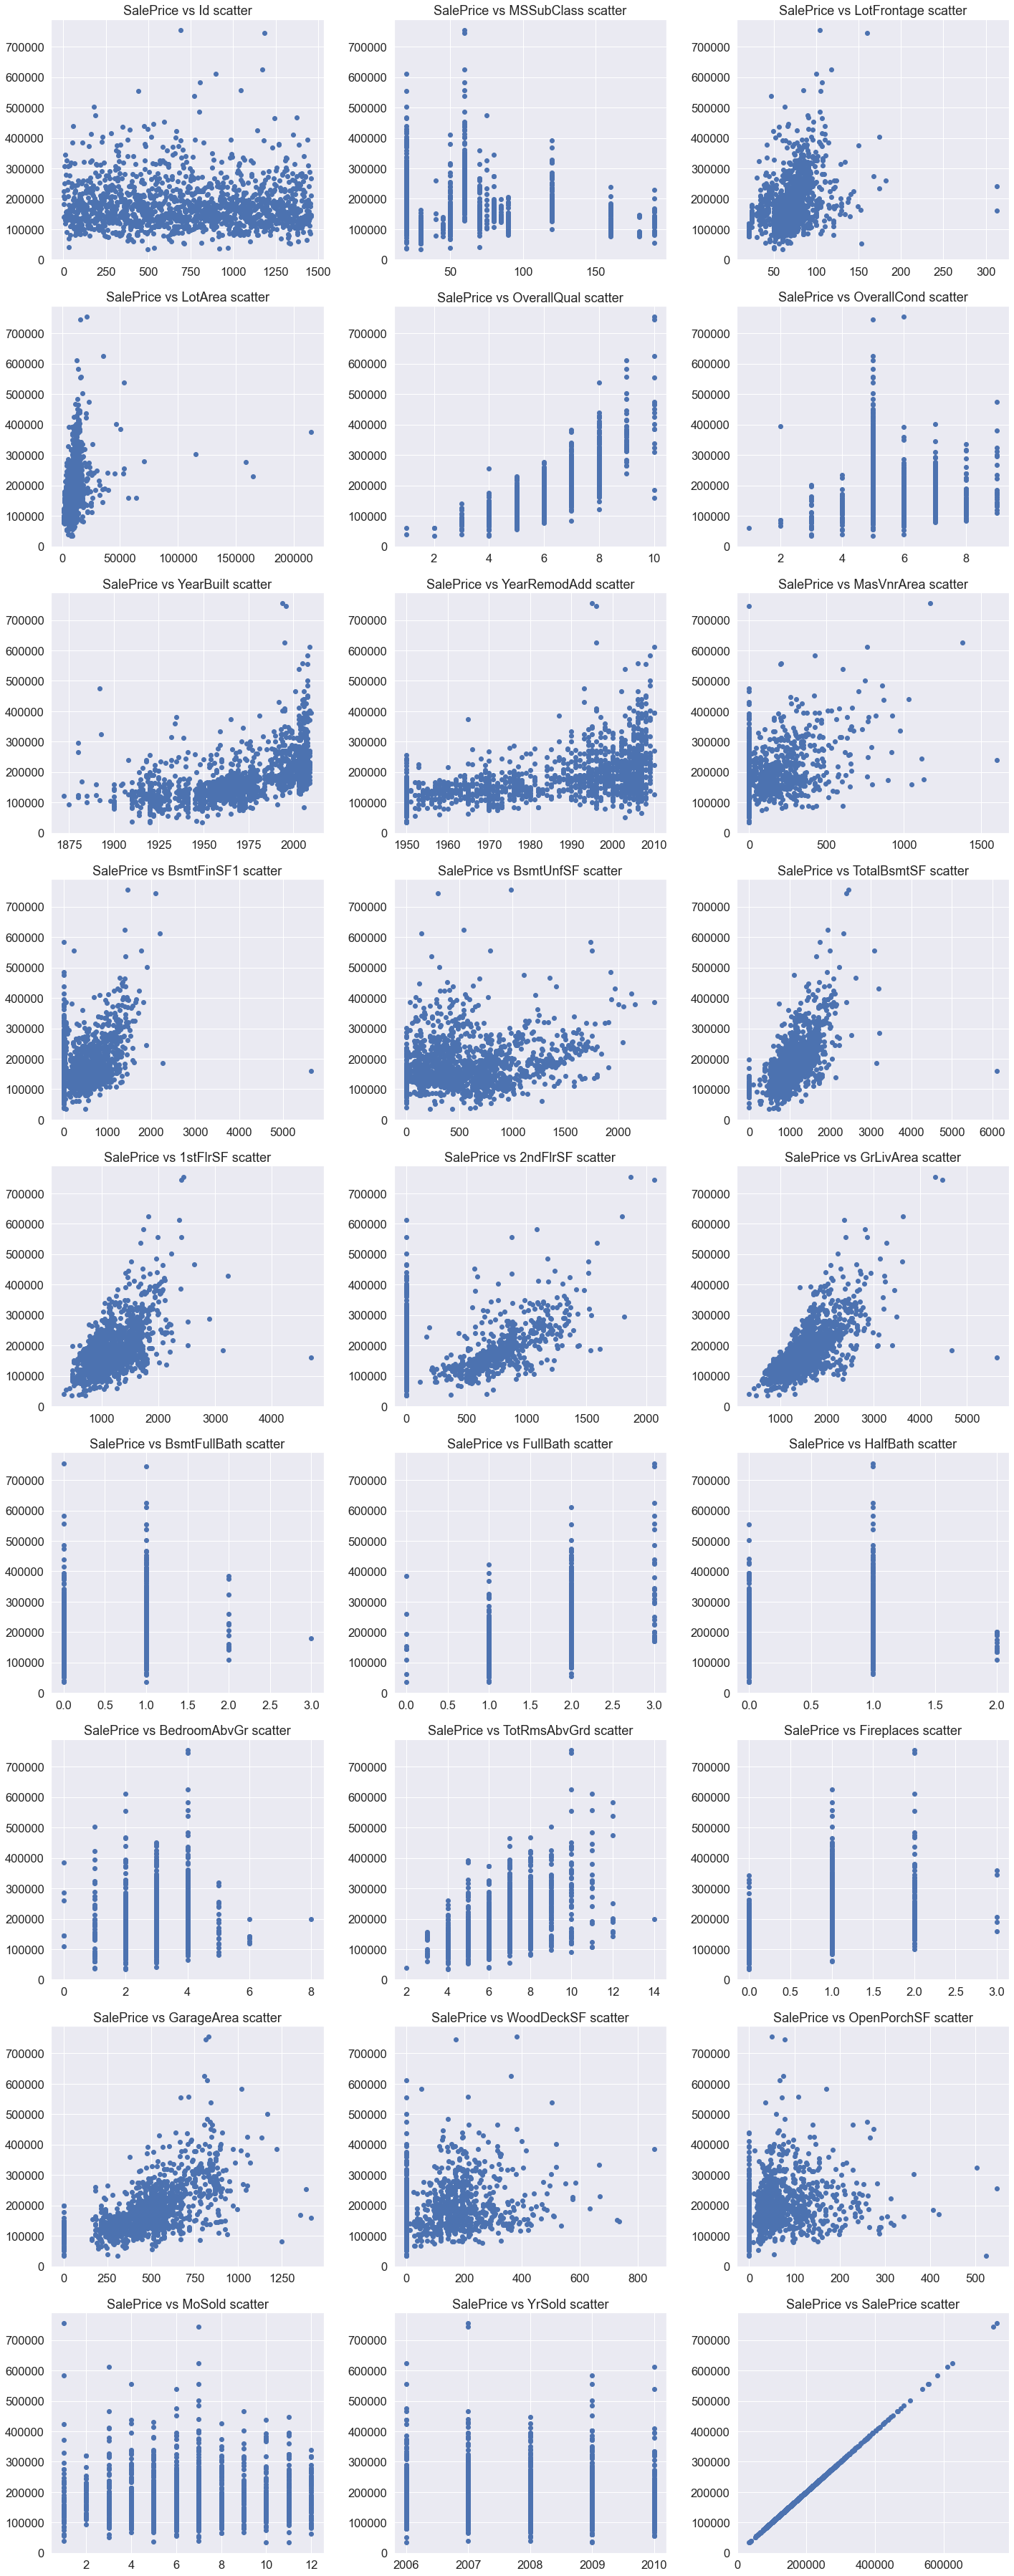

In [40]:
#sns.set()
#sns.set(font_scale=1.5)
def draw_scatter(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize = (20,150))
    for i, var_name in enumerate(columns):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        ax.scatter(df[var_name], df['SalePrice'])
        ax.set_title('SalePrice vs ' + str(var_name) + " scatter")
    fig.tight_layout()
    plt.show()
    
draw_scatter(df_houseprices_3, num_cols, len(num_cols), 3)

- The SalePrice vs LotArea scatter plot stands out. 4 data points are far off to the right of the bulk of the data.
- We could attribute this observation to homes that are cheaper per square foot compared to the other homes.
- However, these data points don't help explain the general trend of the data. Let's give them the boot!

In [41]:
#deleting points
df_houseprices_3[['Id','SalePrice', 'LotArea']].sort_values(by = 'LotArea', ascending = False)
df_houseprices_3 = df_houseprices_3.drop(df_houseprices_3[df_houseprices_3['Id'].isin([314, 336, 250, 707])].index)

Those data points are confirmed to be removed. There are still some data points that look like they are also outliers but they are still loosely grouped around the bulk of the data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


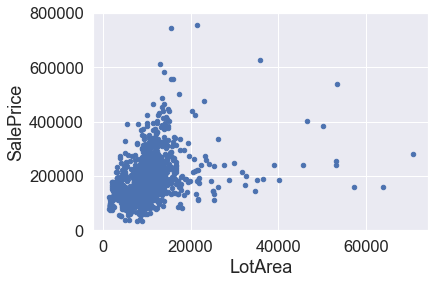

In [42]:
#bivariate analysis saleprice/grlivarea
var = 'LotArea'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- So what? We removed a few data points from 1 observation. 
- Did this impact any other variable?
- Let's review another cross plot that appeared to have an outlier against SalePrice. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


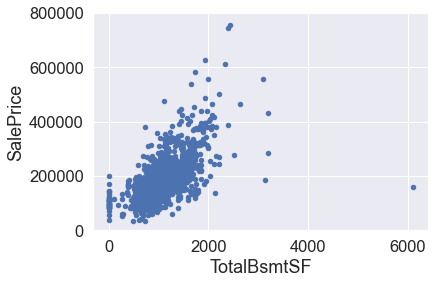

In [43]:
#bivariate analysis SalePrice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


- Comparing this TotalBsmtSF vs SalePrice scatter plot with the original, we can see that even some of these would-be outliers were removed.
- There is still has an outlier all out by itself.
- Let's remove it and view the plot to see if we fixed anything.

In [44]:
df_houseprices_2[['Id','SalePrice', 'TotalBsmtSF']].sort_values(by = 'TotalBsmtSF', ascending = False)
df_houseprices_3 = df_houseprices_3.drop(df_houseprices_3[df_houseprices_3['Id'] == 1299].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


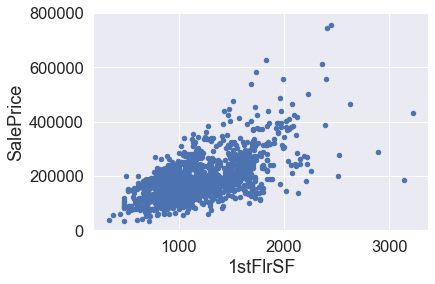

In [45]:
#bivariate analysis saleprice/grlivarea
var = '1stFlrSF'
data = pd.concat([df_houseprices_3['SalePrice'], df_houseprices_3[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- YUP!! This scatter plot was cleaned up by removing the previous data point.
- Next, let's take a look at SalePrice. Again, we likely won't model it directly to avoid a supervised learning "gotcha" but we can't ignore it altogether. 

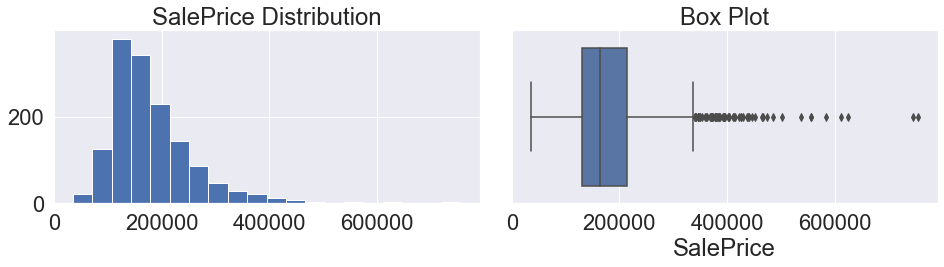

In [46]:
fig = plt.figure(figsize=(20,7))
sns.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('SalePrice Distribution')
df_houseprices_3['SalePrice'].hist(bins=20);
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Box Plot')
sns.boxplot(df_houseprices_3['SalePrice'])
plt.tight_layout()

We can see that there are very few homes that cost more than $350,000. These homes might be difficult to place in a cluster so we'll remove these rows from the dataframe.

In [47]:
print(pd.value_counts(df_houseprices_3['SalePrice']<350000))
df_houseprices_3 = df_houseprices_3[df_houseprices_3['SalePrice']<350000]
target_val = df_houseprices_3['SalePrice'].values

True     1400
False      55
Name: SalePrice, dtype: int64


Removing only the outliers on variables where the data makes sense to do so. If we normalize everything, then we run the risk of losing integrity of the data because many homes simply will not have the same feature sets as others. Also, some variables have a fewer inputs than others where the data is 0 (such as fireplaces). Removing assumed outliers without considering these implications can remove possibly helpful features. 

## 5. Reducing Collinearity

In this section, we'll look at a correlation matrix of features to determine if any of them are highly correlated with each other. This step can potentially reduce over fitting in the models.

In [48]:
df_houseprices_4 = df_houseprices_3.copy()

In [49]:
# new numeric column list
num_cols_2 = [col_name for col_name in df_houseprices_4.select_dtypes(['int64', 'float64']).columns.copy()
              if col_name not in ["Id", "SalePrice"]]

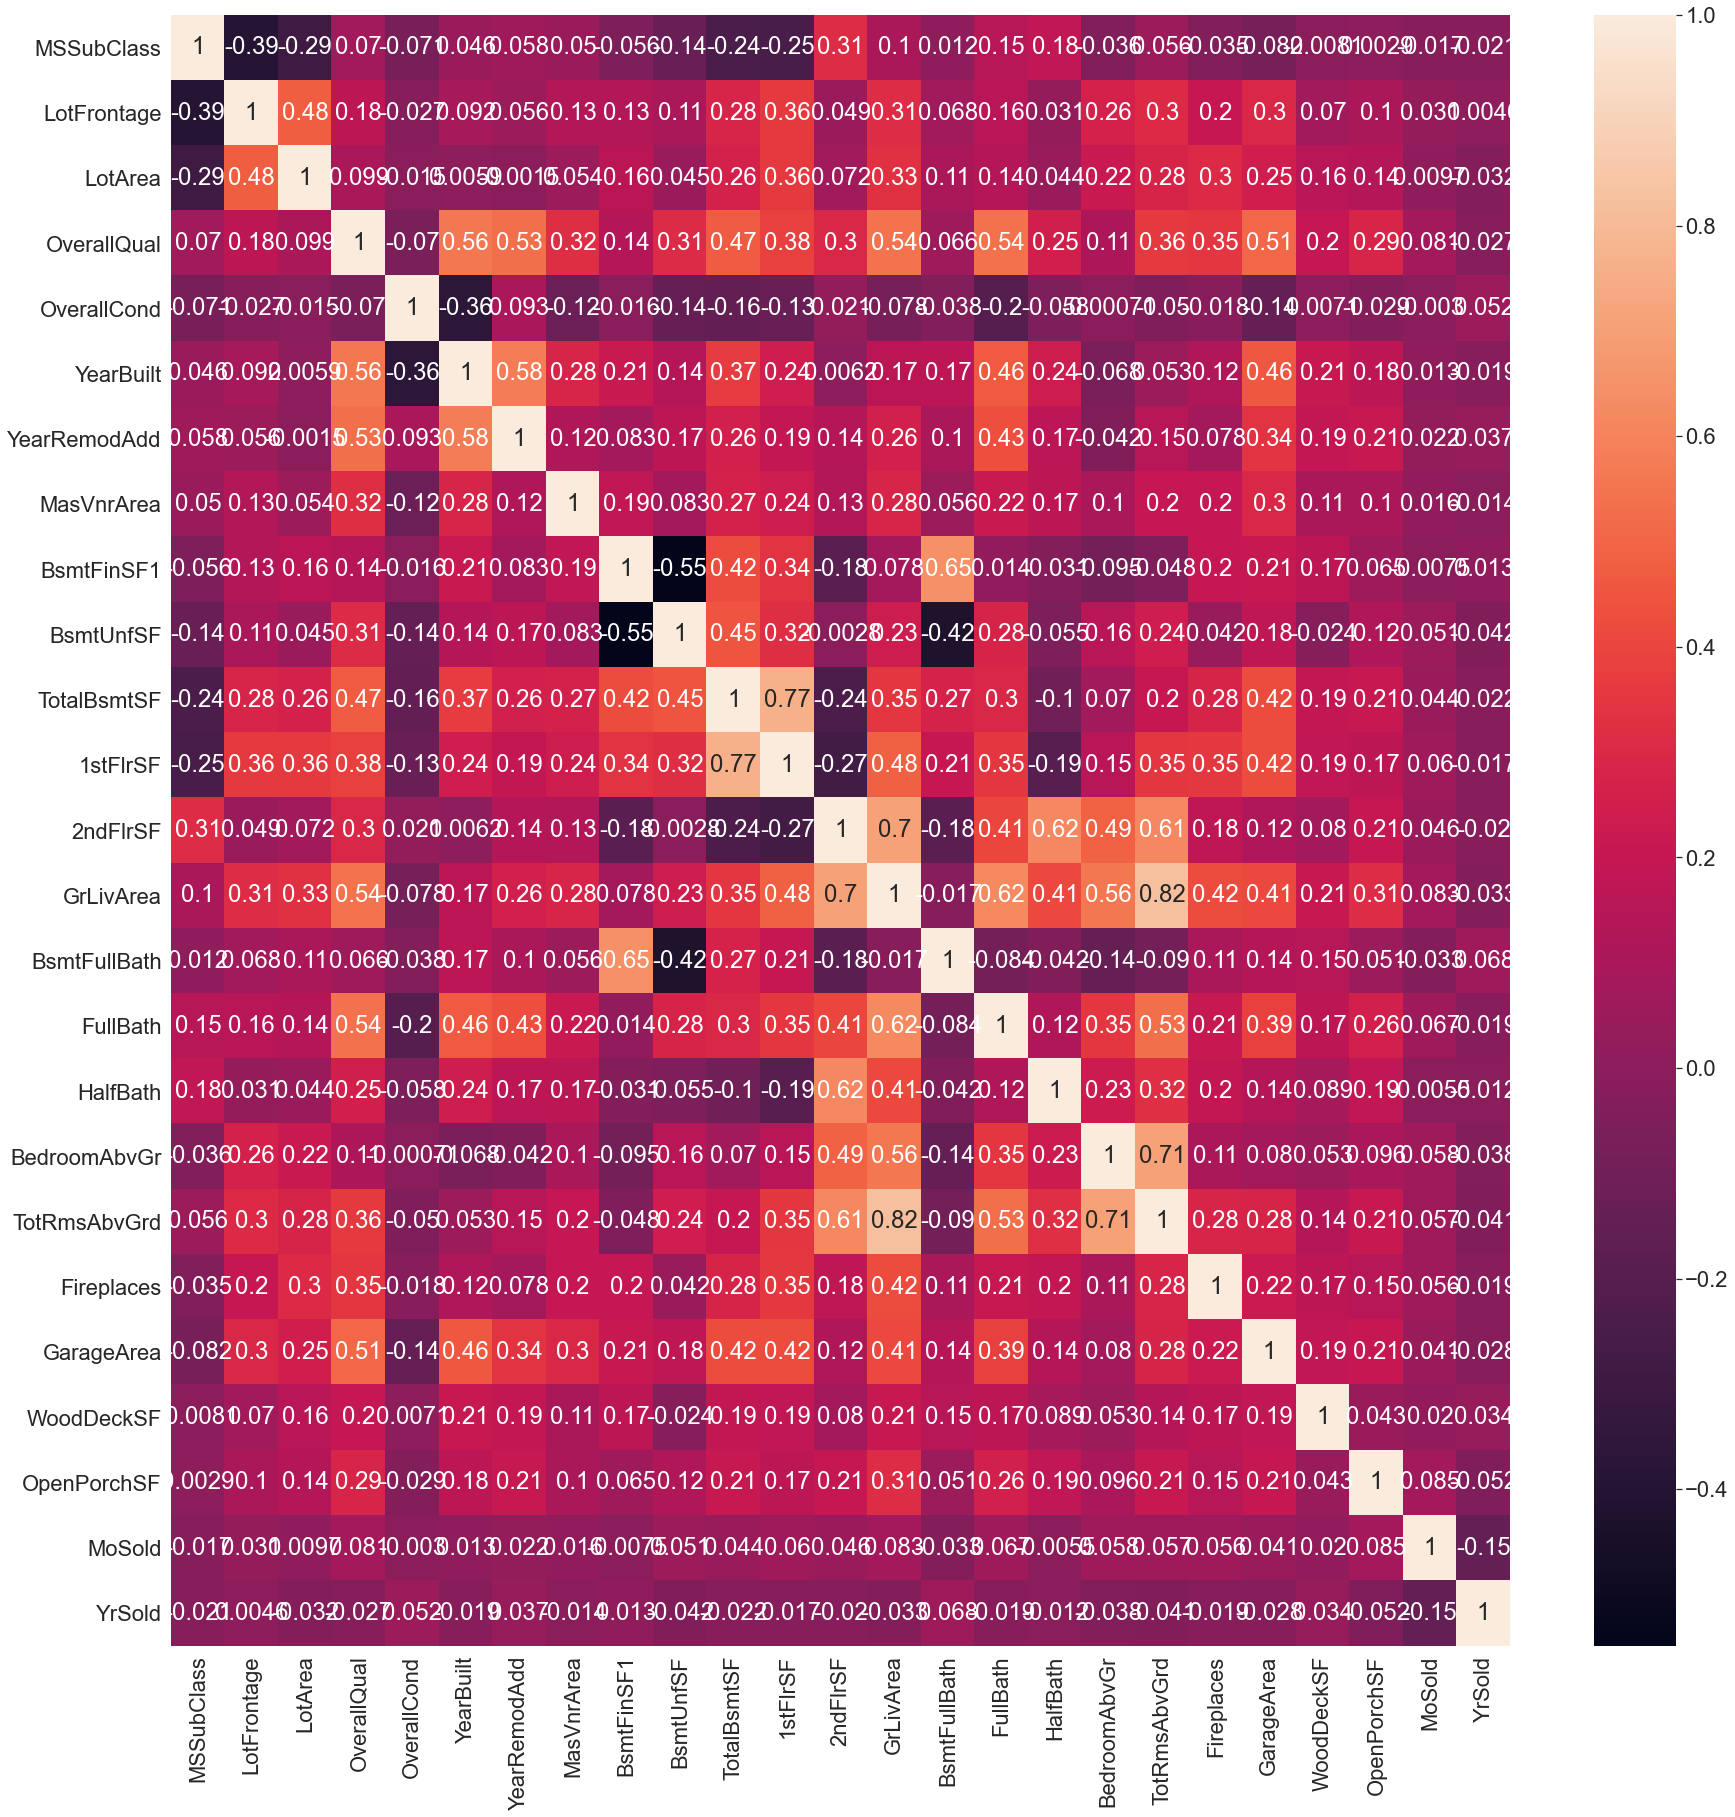

In [50]:
# See the correlation heatmap of the features
plt.figure(figsize=(30,30))
sns.heatmap(df_houseprices_4[num_cols_2].corr(),annot=True)

The correlation coef cut off of 0.67 was decided based on visual aid. 1 feature from any pairs of columns that have relationships greater than 0.67 will be removed.

In [51]:
# Create correlation matrix
corr_matrix = df_houseprices_4[num_cols_2].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.87
to_drop = [column for column in upper.columns if any(upper[column] > 0.67)]

# Drop features 
df_houseprices_4.drop(to_drop, axis=1, inplace=True)

In [52]:
# new numeric column list
num_cols_3 = df_houseprices_4.select_dtypes(['int64', 'float64']).columns.copy()

## 6. Model Prep

The dataframe is cleaned up now and we'll move forward on to prepping the model.

In [53]:
# split features into numeric and categorical
numer = set(df_houseprices_4.corr()['SalePrice'].index)
categ = list(set(df_houseprices_4.columns) - set(df_houseprices_4.corr()['SalePrice'].index))

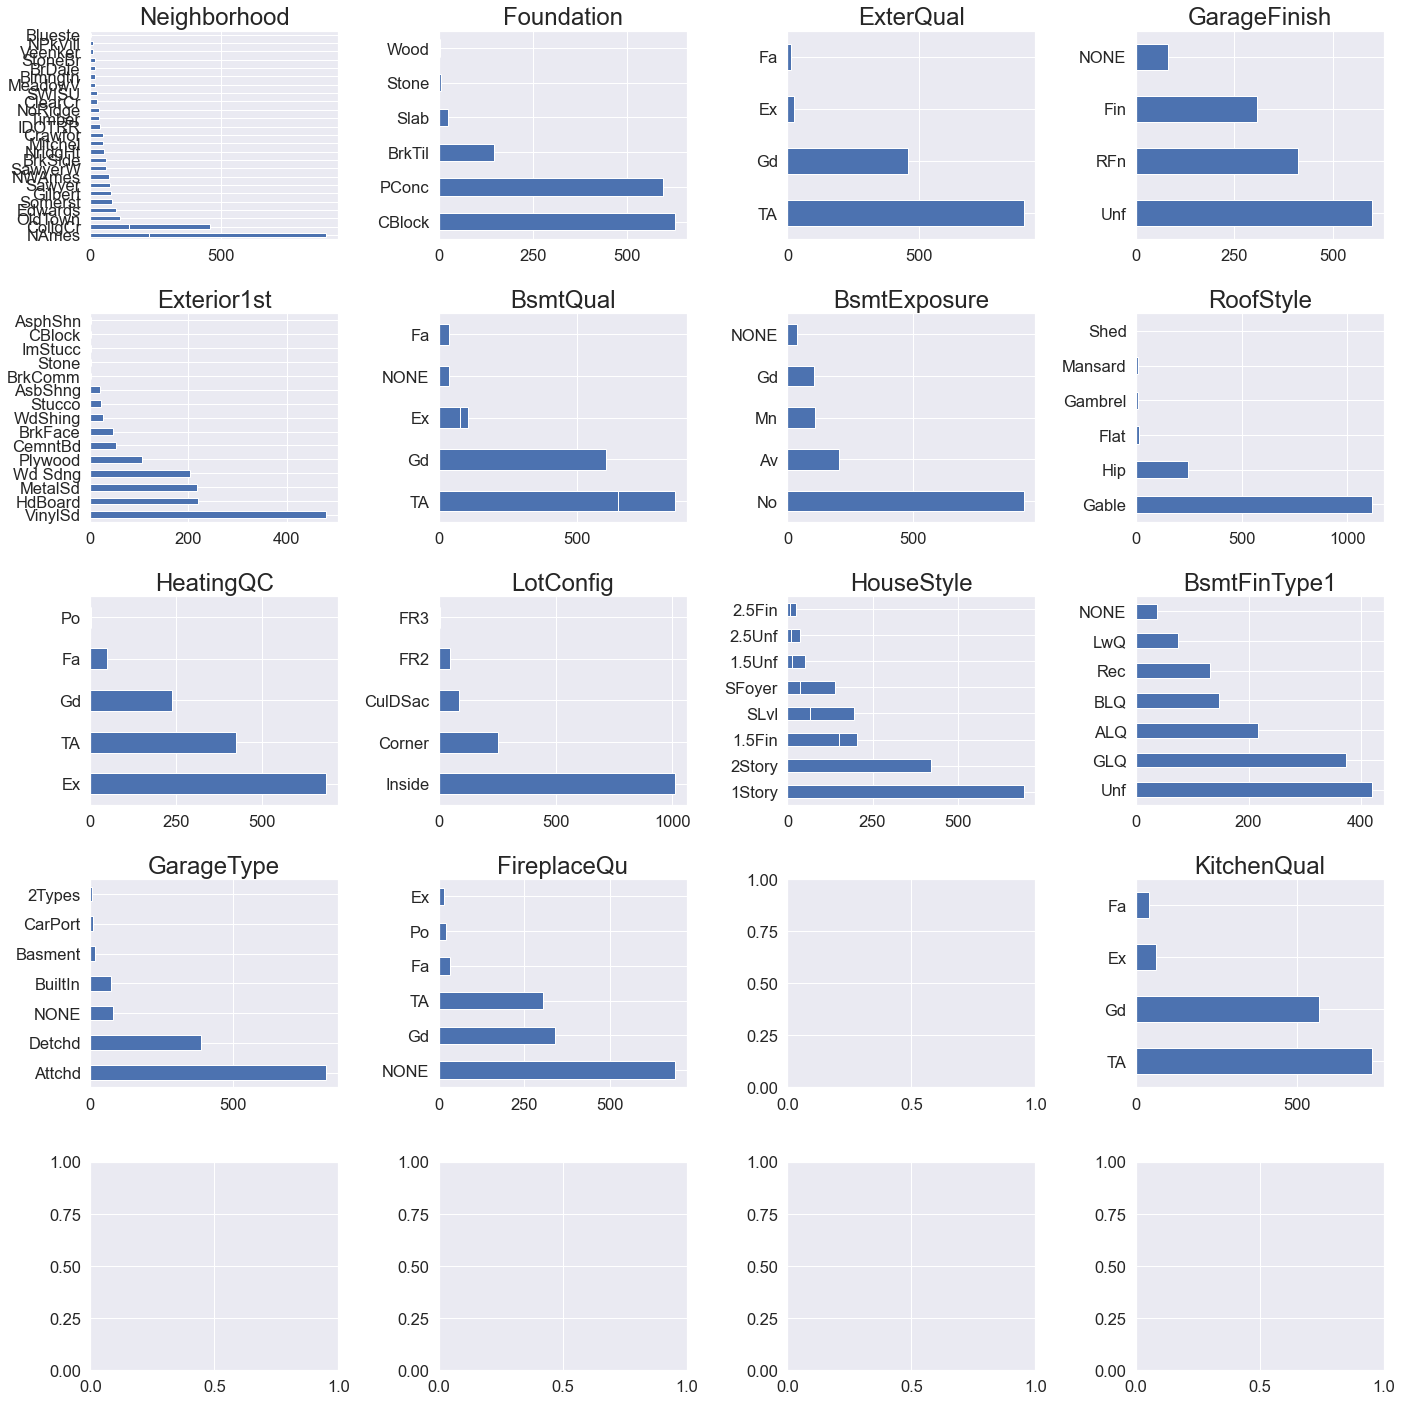

In [54]:
sns.set()
sns.set(font_scale=1.5)
n_row = 5
n_col = 4
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sns.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(df_houseprices_4[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

First, let's create a new column that converts SalePrice into a categorical variable. We will cut SalePrice to 5 parts and see to the distribution. So I will check significance of features to the target. This will also aid us in visuals after we cluster the data.

In [55]:
df_houseprices_5 = df_houseprices_4.copy()

No handles with labels found to put in legend.


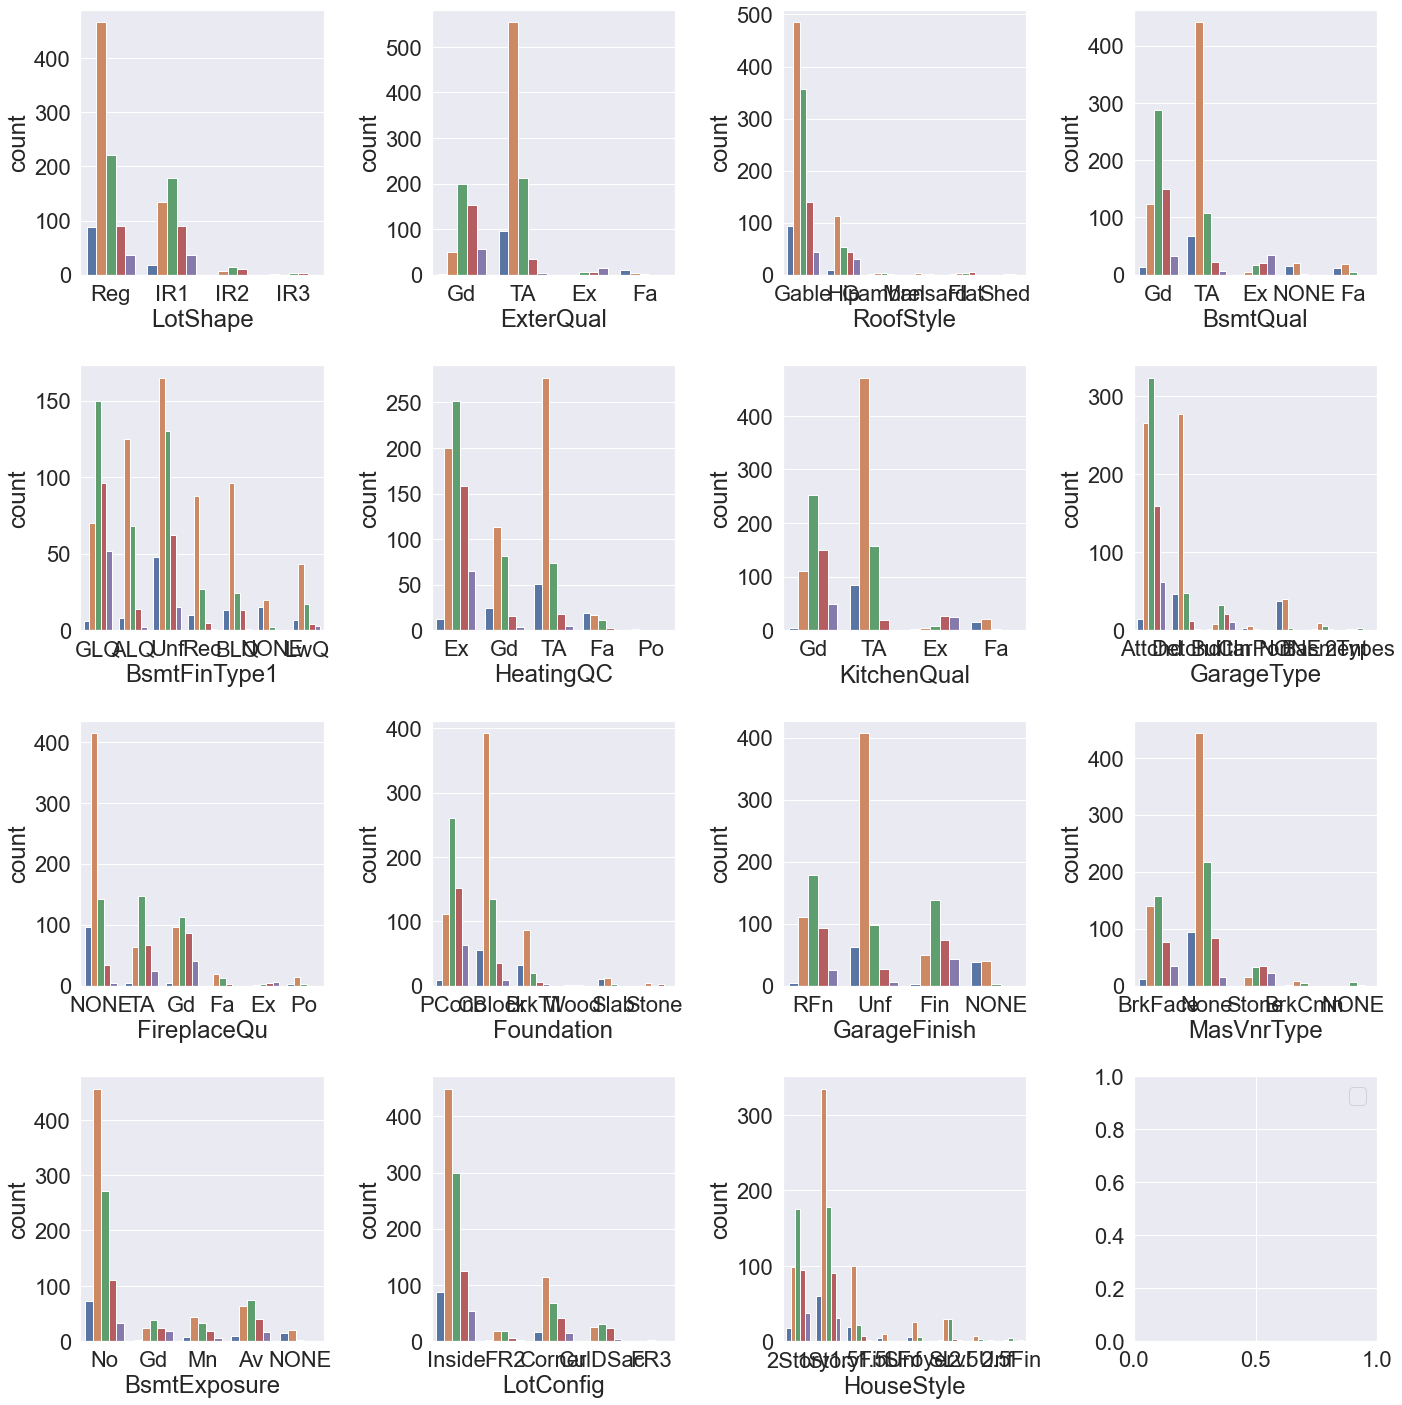

In [56]:
# cutting SalePrice into 5 sections 
# basically transforms coloumn from continuous to categorical variable
# plot other cat variables against saleprice (cut)
cut_value = pd.cut(df_houseprices_5['SalePrice'],5).values
df_houseprices_5['SalePrice_Cut'] = cut_value
sns.set(font_scale=2)
n_row = 4
n_col = 4
categ_targ = set(categ) - set(['Exterior2nd','Neighborhood','Exterior1st'])
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sns.set(font_scale=2)
sns.axes_style("whitegrid")

for i in enumerate(categ_targ):
    qq=sns.countplot(df_houseprices_5[i[1]],ax=axes[i[0]//n_row,i[0]%n_col],\
                     hue=df_houseprices_5['SalePrice_Cut'])
    qq.legend_.remove()
plt.legend().set_title('')
plt.tight_layout()


One could argue 3-5 way split is the way to go. With how many variables we'll introduce, I'm sticking with 5 just in case we see otherwise hidden trends.

Next, let's transform categoricaly variables into numeric values.

In [57]:
# new dataframe and removing YearRemodAdd
df_clusters = df_houseprices_5.dropna().copy()
df_clusters = df_clusters.drop('YearRemodAdd', axis=1).copy()

In [58]:
for i in categ:
    df_clusters[i] = df_clusters[i].factorize()[0]
df_clusters.head(3)

Id  MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  Neighborhood  \
0   1          60       65.000     8450         0          0             0   
1   2          20       80.000     9600         0          1             1   
2   3          60       68.000    11250         1          0             0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  RoofStyle  Exterior1st  \
0           0            7            5       2003          0            0   
1           1            6            8       1976          0            1   
2           0            7            5       2001          0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  Foundation  BsmtQual  \
0            0           0     196.000          0           0         0   
1            1           1       0.000          1           1         0   
2            0           0     162.000          0           0         0   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             0             0         706        150          856          0   
1             1             1         978        284         1262          0   
2             2             0         486        434          920          0   

   2ndFlrSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0       854             1         2         1             3            0   
1         0             0         2         0             3            1   
2       866             1         2         1             3            0   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageArea  WoodDeckSF  \
0           0            0           0             0         548           0   
1           1            1           0             0         460         298   
2           1            1           0             0         608           0   

   OpenPorchSF  MoSold  YrSold  SalePrice         SalePrice_Cut  
0           61       2    2008     208500  (160140.0, 222760.0]  
1            0       5    2007     181500  (160140.0, 222760.0]  
2           42       9    2008     223500  (222760.0, 285380.0]

## 6.1 Multicollinear Relationships
Now that we've transformed the categorical data into numeric format, we can check for multicollinear relationships. This will help us avoid over fitting the models.

In [60]:
# multicollinear function won't work with some special characters, so we need to remove them
spec_chars = ['.', ' ', '(', ')', '__', '&']
# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_clusters.columns = df_clusters.columns.str.replace(char, '_')

In [61]:
# this was another dumb column format issue to ensure the upcoming script works properly.
df_clusters.rename(columns={'2ndFlrSF':'SndFlrSF'}, inplace=True)

df_clusters.rename(columns={'Exterior2nd':'ExteriorSnd'}, inplace=True)

df_clusters.rename(columns={'Exterior1st':'ExteriorFirst'}, inplace=True)

df_clusters.rename(columns={'BsmtFinSF1':'BsmtFinSFFirst'}, inplace=True)

df_clusters.rename(columns={'BsmtFinType1':'BsmtFinTypeOne'}, inplace=True)

In [63]:
# function that ranks ranges of multicollinear relationships for each column

def VRF(predict, data, y):
   
    scale = StandardScaler(with_std=False)
    df = pd.DataFrame(scale.fit_transform(data), columns= cols)
    features = "+".join(cols)
    df['SalePrice'] = y.values

    # get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df, return_type='dataframe')

   # Calculate VIF Factors
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    # Inspect VIF Factors
    display(vif.sort_values('VIF Factor'))
    return vif

# Remove the higest correlations and run a multiple regression
cols = df_clusters.columns
cols = cols.drop(['SalePrice', 'SalePrice_Cut'])
vif = VRF('SalePrice', df_clusters.loc[df_clusters.SalePrice>0, cols], df_clusters.SalePrice[df_clusters.SalePrice>0])

VIF Factor        features
0        1.000       Intercept
1        1.020              Id
39       1.052          MoSold
40       1.052          YrSold
6        1.142       LotConfig
12       1.143       RoofStyle
37       1.167      WoodDeckSF
15       1.184      MasVnrType
7        1.193    Neighborhood
38       1.193     OpenPorchSF
5        1.304        LotShape
20       1.324    BsmtExposure
8        1.354      HouseStyle
10       1.379     OverallCond
35       1.408    GarageFinish
16       1.429      MasVnrArea
31       1.582     KitchenQual
34       1.596      GarageType
25       1.618       HeatingQC
19       1.630        BsmtQual
3        1.644     LotFrontage
21       1.673  BsmtFinTypeOne
4        1.719         LotArea
2        1.733      MSSubClass
30       1.762    BedroomAbvGr
17       1.948       ExterQual
36       1.976      GarageArea
27       2.121    BsmtFullBath
18       2.122      Foundation
33       2.252     FireplaceQu
29       2.267        HalfBath
13       2.458   ExteriorFirst
28       2.495        FullBath
14       2.574     ExteriorSnd
32       2.607      Fireplaces
9        2.890     OverallQual
26       4.195        SndFlrSF
11       4.274       YearBuilt
22       8.082  BsmtFinSFFirst
24       8.518     TotalBsmtSF
23       9.185       BsmtUnfSF

We see some large numbers that suggest multicollinear relationships. We can't simply remove whatever we want due to the nature of how each feature is linked in the function. Through an iterative process, we'll have to remove 1 feature at a time to see the impact. We don't want to accidentally remove features that might help us in the clustering process.

The following columns were removed: 'BsmtUnfSF', 'BsmtFinSFFirst', 'SndFlrSF', 'YearBuilt', 'ExteriorSnd', 'FireplaceQu', 'TotalBsmtSF', 'HeatingQC', 'ExterQual', 'LotFrontage'

In [64]:
# Remove one feature with VIF on Inf from the same category and run a multiple regression
cols = cols.drop(['BsmtUnfSF', 'BsmtFinSFFirst', 'SndFlrSF', 'YearBuilt', 'ExteriorSnd', 'FireplaceQu', 'TotalBsmtSF', 'HeatingQC', 'ExterQual', 'LotFrontage'])
cols_drop = ['BsmtUnfSF', 'BsmtFinSFFirst', 'SndFlrSF', 'YearBuilt', 'ExteriorSnd', 'FireplaceQu', 'TotalBsmtSF', 'HeatingQC', 'ExterQual', 'LotFrontage']
vif = VRF('SalePrice', df_clusters.loc[df_clusters.SalePrice>0, cols], df_clusters.SalePrice[df_clusters.SalePrice>0])

VIF Factor        features
0        1.000       Intercept
1        1.016              Id
30       1.046          YrSold
29       1.047          MoSold
10       1.121       RoofStyle
5        1.132       LotConfig
27       1.141      WoodDeckSF
16       1.159    BsmtExposure
28       1.166     OpenPorchSF
9        1.168     OverallCond
12       1.172      MasVnrType
6        1.178    Neighborhood
11       1.185   ExteriorFirst
18       1.262    BsmtFullBath
7        1.274      HouseStyle
4        1.274        LotShape
13       1.355      MasVnrArea
23       1.364      Fireplaces
22       1.376     KitchenQual
21       1.386    BedroomAbvGr
2        1.391      MSSubClass
25       1.400    GarageFinish
20       1.432        HalfBath
15       1.449        BsmtQual
17       1.492  BsmtFinTypeOne
3        1.528         LotArea
24       1.541      GarageType
14       1.779      Foundation
26       1.852      GarageArea
19       2.062        FullBath
8        2.327     OverallQual

In [65]:
df_clusters = df_clusters.drop(cols_drop, axis = 1).copy()
df_clusters.shape

(1400, 32)

# 7. Unsupervised Clustering

We've prepped the dataframe. Next step is to define our features in the model. We'll exclude Id, SalePrice, and SalePrice_cut to focus on the features that describe each property. SalePrice was include in previous attempts but the results seemed to worsen.

As mentioned in the introduction, we will decrease dimensionality first and then cluster on the principal components. This is assuming that the components accurately represent the data in a lower dimension. PCA and UMAP will be applied and each method will be clustered by K-means, Hierarchical, and Gaussian Mixture Model (GMM) for comparison.

In [66]:
# creating new feature list, excluding Id, SalePrice, and SalePrice_cut

feature_list = [col_name for col_name in df_clusters.columns
              if col_name not in ["Id", 'SalePrice', 'SalePrice_Cut']]

In [67]:
# defining X for modeling
X = df_clusters[feature_list]

In [68]:
# run normalizer on data to apply a common range
nrm = Normalizer()
nrm.fit(X)
X_norm = nrm.transform(X)

## 7.1 PCA Dimensionality Reduction

Now, the fun begins. Let's start with reducing our dataframe using PCA. We need to try a couple of methods to determine the optimum number of principal components that describes the data.

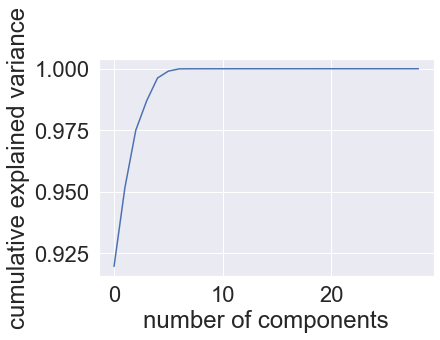

In [69]:
# cumulative PCA plot
pca = PCA().fit(X_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [98]:
# pca with 2 components
pca = PCA(n_components=2)
scores_pca = pca.fit_transform(X_norm)

print('Variance Ratio 2 components: ' + str(pca.explained_variance_ratio_)) 

Variance Ratio 2 components: [0.91952526 0.03207337]


2 principal components explants about 95% of the data. That's great news since we'll only have to display the data in 2 dimensions later on.

## 7.2 PCA - K-means Clustering
Let's deploy k-means clustering on our 2 principal components.
Our workflow will begin by determining an optimum number of clusters by reviewing the elbow and silhoutte score methods.

In [71]:
# Not knowing the number of clusters (3) we try a range such 1,10
# For the ELBOW method check with and without init='k-means++'

Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(scores_pca)
    Sum_of_squared_distances.append(km.inertia_)

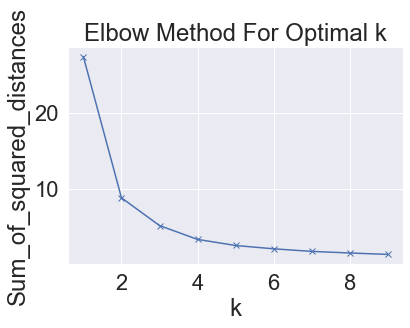

In [72]:
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

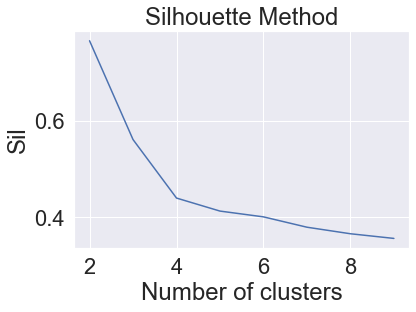

2:0.7659472719565591
3:0.5612843185949864
4:0.44011705014648117
5:0.41315533392572784
6:0.4011656734532143
7:0.3797489216296937
8:0.36619418954653804
9:0.3565374339362386


In [73]:
#from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
    k_means = KMeans(n_clusters = k).fit(scores_pca)  
    preds = k_means.fit_predict(scores_pca)
    sil.append(silhouette_score(scores_pca, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Let's start with 3 clusters. It seems apparant that there could be 2 major groups but the silhouette plot hints that 3 unique groups may exist.

In [74]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit(scores_pca)

After we cluster the data, we'll concatonate the cluster assignments and principle components on our dataframe so we can smoothly plot the data.

In [75]:
# adding cluster assignments and principle components back to dataframe
df_pca_kmeans = pd.concat([df_clusters.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-2:] = ['PC1', 'PC2']
df_pca_kmeans['PCA_Clusters'] = kmeans.labels_

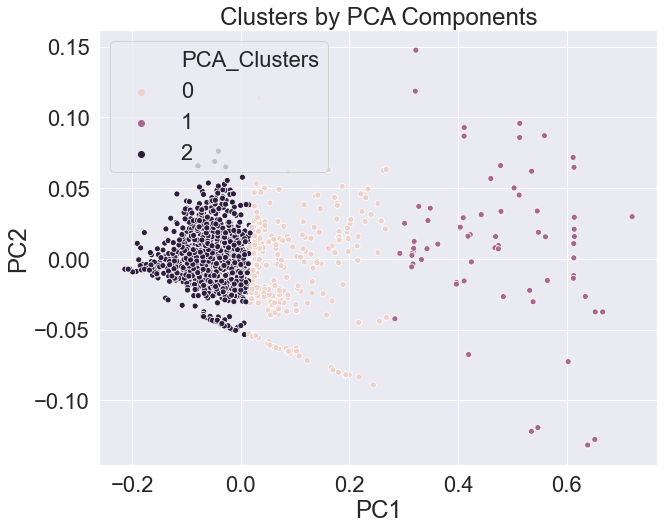

In [76]:
# group PCA by clusters and plot
x_axis = df_pca_kmeans['PC1']
y_axis = df_pca_kmeans['PC2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans['PCA_Clusters'])
plt.text
plt.title('Clusters by PCA Components')
plt.show()

It's a bit obvious now why the models wanted to use just 2 clusters. However, this plot demonstrates to possibility of 3 clusters.

## 7.3 PCA - Hierarchical clustering

Before we run away with hierarchical clustering, let's check out a few options to get the best performance with 3 clusters.

In [77]:
# Defining the agglomerative clustering - complete
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_pca)

print("The silhoutte score of linkage method complete: {}"
      .format(metrics.silhouette_score(scores_pca, clusters, metric='euclidean')))

print('---------------------------------------------------------')

# Defining the agglomerative clustering - average
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_pca)

print("The silhoutte score of linkage method average: {}"
      .format(metrics.silhouette_score(scores_pca, clusters, metric='euclidean')))

print('---------------------------------------------------------')


# Defining the agglomerative ward
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_pca)

print("The silhoutte score of linkage method ward: {}"
      .format(metrics.silhouette_score(scores_pca, clusters, metric='euclidean')))

The silhoutte score of linkage method complete: 0.09253236396170303
---------------------------------------------------------
The silhoutte score of linkage method average: 0.11527613982405047
---------------------------------------------------------
The silhoutte score of linkage method ward: 0.5322557886237426


The Ward method has the highest silhouette score with 0.53.

In [78]:
# Defining the agglomerative ward
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
%timeit agg_cluster.fit(scores_pca)
clusters = agg_cluster.fit_predict(scores_pca)

45 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


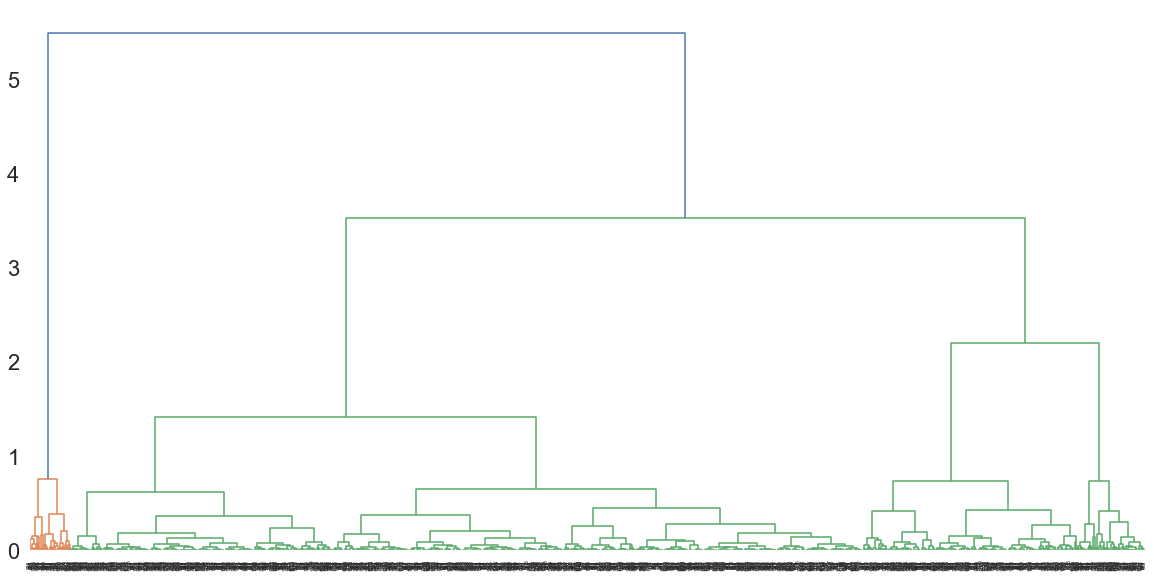

In [81]:
# Dendrogram visualization
plt.figure(figsize=(20,10))
dendrogram(linkage(scores_pca, method='ward'))
plt.show()

A case can still be made for 3 clusters with this dendrogram.

## 7.4 PCA - Gaussian Mixture Model (GMM)
Next, let's deploy the GMM clustering model. We'll use the AIC/BIC method to determine the optimum n_components. We'll look for the fewest components that have the lowest (best) score.

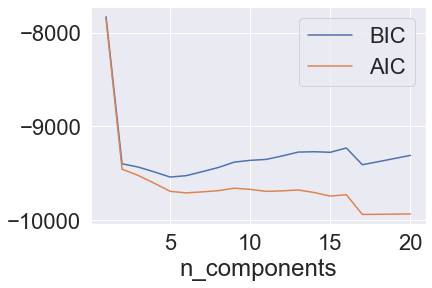

In [79]:
# find best BIC/AIC scores 
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=123).fit(scores_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(scores_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scores_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The lowest score with the fewest components fits right around 3 for both BIC and AIC.

In [80]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type="full", random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(scores_pca)

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(scores_pca, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.6120420583126681


As before, we'll create a dataframe that includes the data, clusters, and components.

In [81]:
df_pca_gmm= pd.concat([df_clusters.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_gmm.columns.values[-2:] = ['PC1', 'PC2']
df_pca_gmm['PCA_Clusters'] = clusters

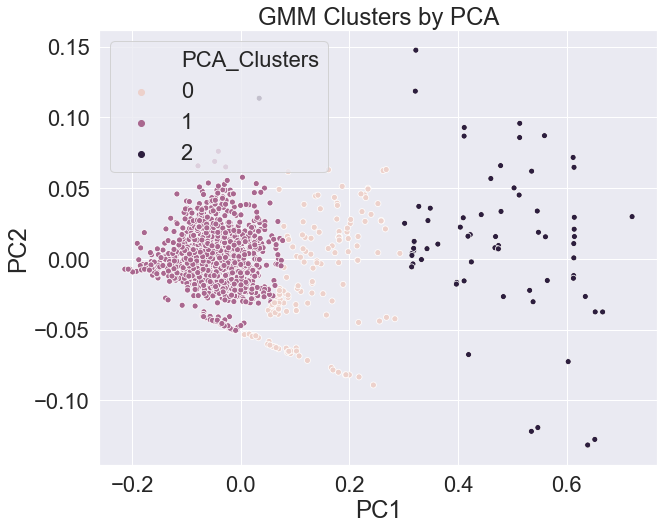

In [82]:
x_axis = df_pca_gmm['PC1']
y_axis = df_pca_gmm['PC2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_gmm['PCA_Clusters'])
plt.text
plt.title('GMM Clusters by PCA')
plt.show()

__Clustering with PCA Results:__<br>

Silhouette scores:
- K-means: 0.561
- Hierarchical: 0.532
- GMM: 0.612

Looking at scores, we can suggest GMM is the best model with PCA. In this case, all 3 seem to do a pretty good job at breaking out the 2 major clusters and provides some detail with 2 closely related clusters. Due to speed of the algorithm, we may lean on K-means if we include a lot more data. However, the data isn't really grouped in circular form and that could impede K-mean's ability to accurately designate clusters. So far, my favorite model is GMM due to its flexibility of data relationship and speed.

Let's check out the UMAP method next.

## 7.5 UMAP Dimensionality Reduction

One of the benefits of UMAP dimensionality reduction is its ability breakdown complex data relationships quickly. UMAP also preservers much of the global structure and local similarity of the data. However, getting the parameters correct is a bit taxing. We've gone through multiple iterations of n_neighbors and min_dist values. In addition, we compared the "metric" features and found that "correlation" performs better than "euclidean" with this dataset.

Here, we found that the best parameter values for UMAP were:
- n_neighbors = 9
- min_dist = 0.1
- metric = 'correlation'
- random_state = 123

UMAP done! Time elapsed: 9.744397640228271 seconds


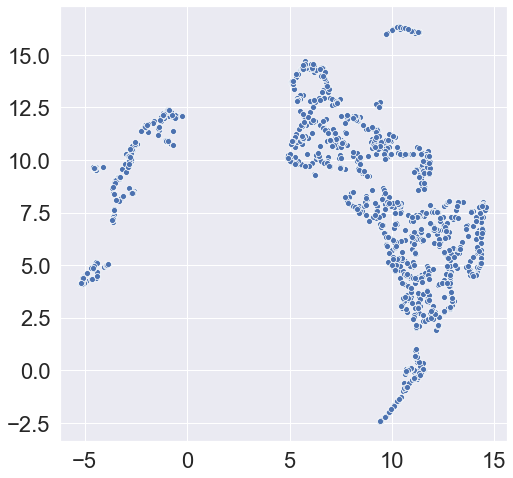

In [83]:
# UMAP with n_neighbors=9, min_dist=0.1, metric='correlation'
time_start = time.time()

scores_umap = umap.UMAP(n_neighbors=9, min_dist=0.1,
                        metric='correlation', random_state=123).fit_transform(X)
#scores_umap = umap_2.fit_transform(X_norm)
plt.figure(figsize=(8,8))
sns.scatterplot(scores_umap[:,0],scores_umap[:,1])

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start));

## 7.6 UMAP - K-means
Now that we've reduced our dimensionality, let's run through the various clustering algorithms as before. 

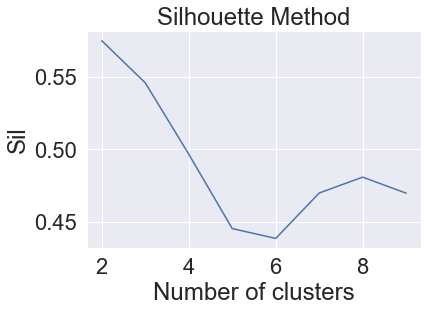

2:0.5747877
3:0.5457579
4:0.4966149
5:0.44530848
6:0.43852618
7:0.46981812
8:0.48078373
9:0.46971166


In [84]:
#from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
    k_means = KMeans(n_clusters = k).fit(scores_umap)  
    preds = k_means.fit_predict(scores_umap)
    sil.append(silhouette_score(scores_umap, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

This plot is a bit odd because it goes back up with more clusters. However, 3 clusters still seems like the logical choice going forward.

In [85]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scores_umap)

As before, we are still creating a new dataframe that includes the data, cluster assignments, and principle components.

In [86]:
df_umap_kmeans = pd.concat([df_clusters.reset_index(drop=True), pd.DataFrame(scores_umap)], axis=1)
df_umap_kmeans.columns.values[-2:] = ['umap1', 'umap2']
df_umap_kmeans['UMAP_Clusters'] = kmeans.labels_

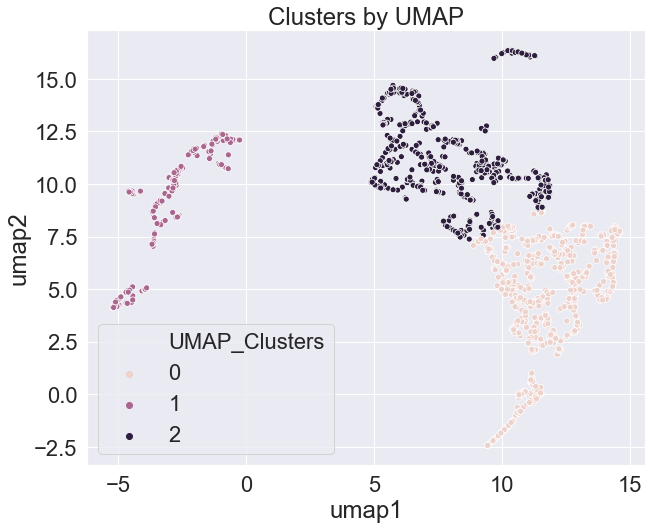

In [87]:
x_axis = df_umap_kmeans['umap1']
y_axis = df_umap_kmeans['umap2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_umap_kmeans['UMAP_Clusters'])
plt.text
plt.title('Clusters by UMAP')
plt.show()

## 7.7 UMAP - Hierarchical clustering
We'll repeat the comparative method to determine which agglomerative clustering model we should use. Each method will use 3 clusters for input.

In [88]:
# Defining the agglomerative clustering - complete
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_umap)

print("The silhoutte score of linkage method complete: {}"
      .format(metrics.silhouette_score(scores_umap, clusters, metric='euclidean')))

print('---------------------------------------------------------')

# Defining the agglomerative clustering - average
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_umap)

print("The silhoutte score of linkage method average: {}"
      .format(metrics.silhouette_score(scores_umap, clusters, metric='euclidean')))

print('---------------------------------------------------------')


# Defining the agglomerative ward
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(scores_umap)

print("The silhoutte score of linkage method ward: {}"
      .format(metrics.silhouette_score(scores_umap, clusters, metric='euclidean')))

The silhoutte score of linkage method complete: 0.5395166277885437
---------------------------------------------------------
The silhoutte score of linkage method average: 0.5421774387359619
---------------------------------------------------------
The silhoutte score of linkage method ward: 0.5442222952842712


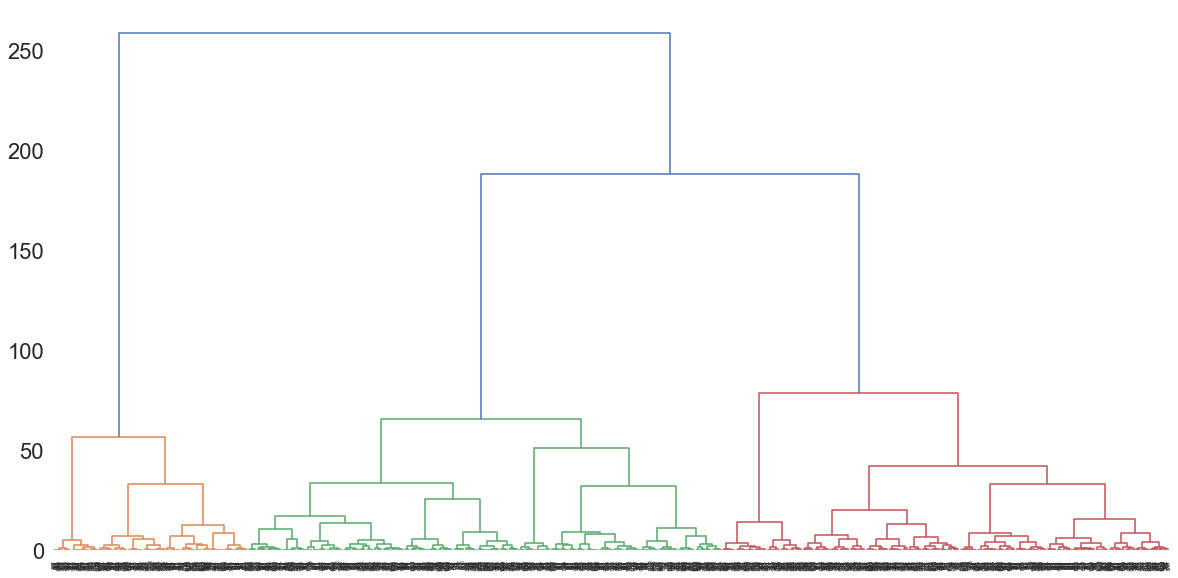

In [89]:
# Dendrogram visualization
plt.figure(figsize=(20,10))
dendrogram(linkage(scores_umap, method='ward'))
plt.show()

This dendrogram demonstrates that the heirarchical method with UMAP does a better job at grouping 3 clusters than with PCA.

## 7.8 UMAP - GMM
We'll rinse and repeat the parameter tuning methods as before.

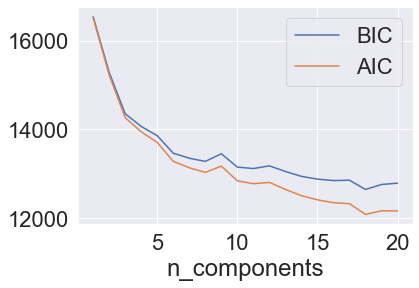

In [90]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=123).fit(scores_umap)
          for n in n_components]

plt.plot(n_components, [m.bic(scores_umap) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scores_umap) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

This AIC/BIC plot looks different than the last one. If we follow the same logic, then we'd select a larger n_component value than 3. However, we also need to keep in mind that each model up to this point suggests 3 clusters is reasonable. In addition, the city of Ames is not that big, and the data set is of modest size. If we complicate the model by adding too many clusters, then we might not have an effective model that fits the scope of the project. More clusters might be beneficial when comparing larger cities with more activity. We're sticking with 3 clusters for input in this case.

In [91]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, covariance_type="full", random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(scores_umap)

In [92]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(scores_umap, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.5360222458839417


In [93]:
df_umap_gmm= pd.concat([df_clusters.reset_index(drop=True), pd.DataFrame(scores_umap)], axis=1)
df_umap_gmm.columns.values[-2:] = ['PC1', 'PC2']
df_umap_gmm['UMAP_Clusters'] = clusters

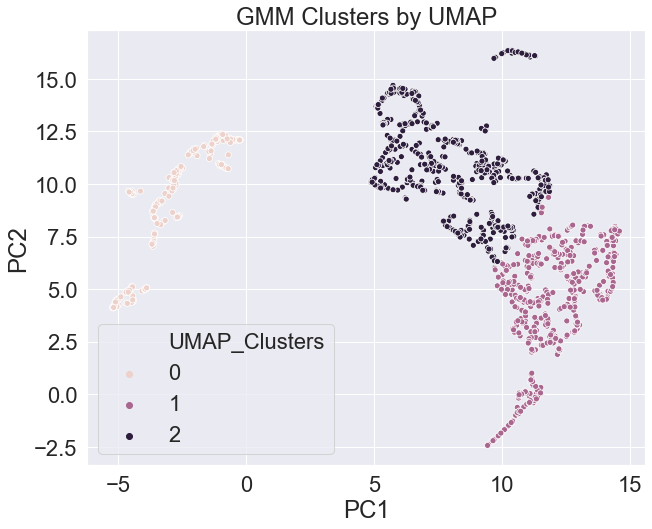

In [94]:
x_axis = df_umap_gmm['PC1']
y_axis = df_umap_gmm['PC2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_umap_gmm['UMAP_Clusters'])
plt.text
plt.title('GMM Clusters by UMAP')
plt.show()

Silhouette scores with UMAP:
- K-means: 0.545
- Hierarchical: 0.544
- GMM: 0.536

Looking at scores, we can argue K-means is the best model with UMAP. However, the differences are marginal (much like in the PCA method). Each model seems to do a similar job with relative performance. In this case my favorite model is still the GMM because the data doesn't depend on circular relationships and it's faster than hierarchical clustering given scale. At this stage, the general insights might not vary widely regardless of which model is used.

We just supported using GMM with UMAP. Let's break down some features by cluster ID to see if the relationships are reasonable. 

In [95]:
# adding YearBuilt and GrLivArea to the dataframe for visualization purposes
df_temp = df_houseprices_3[['Id', 'YearBuilt', 'GrLivArea']].copy()
df_umap_kmeans = pd.merge(df_umap_kmeans, df_temp, on='Id')

# cutting YearBuilt and GrLivArea to transform continuous variables into categorical
cut_value = pd.cut(df_umap_kmeans['YearBuilt'],5).values
df_umap_kmeans['YearBuilt_bin'] = cut_value

cut_value = pd.cut(df_umap_kmeans['GrLivArea'],5).values
df_umap_kmeans['GrLivArea_bin'] = cut_value

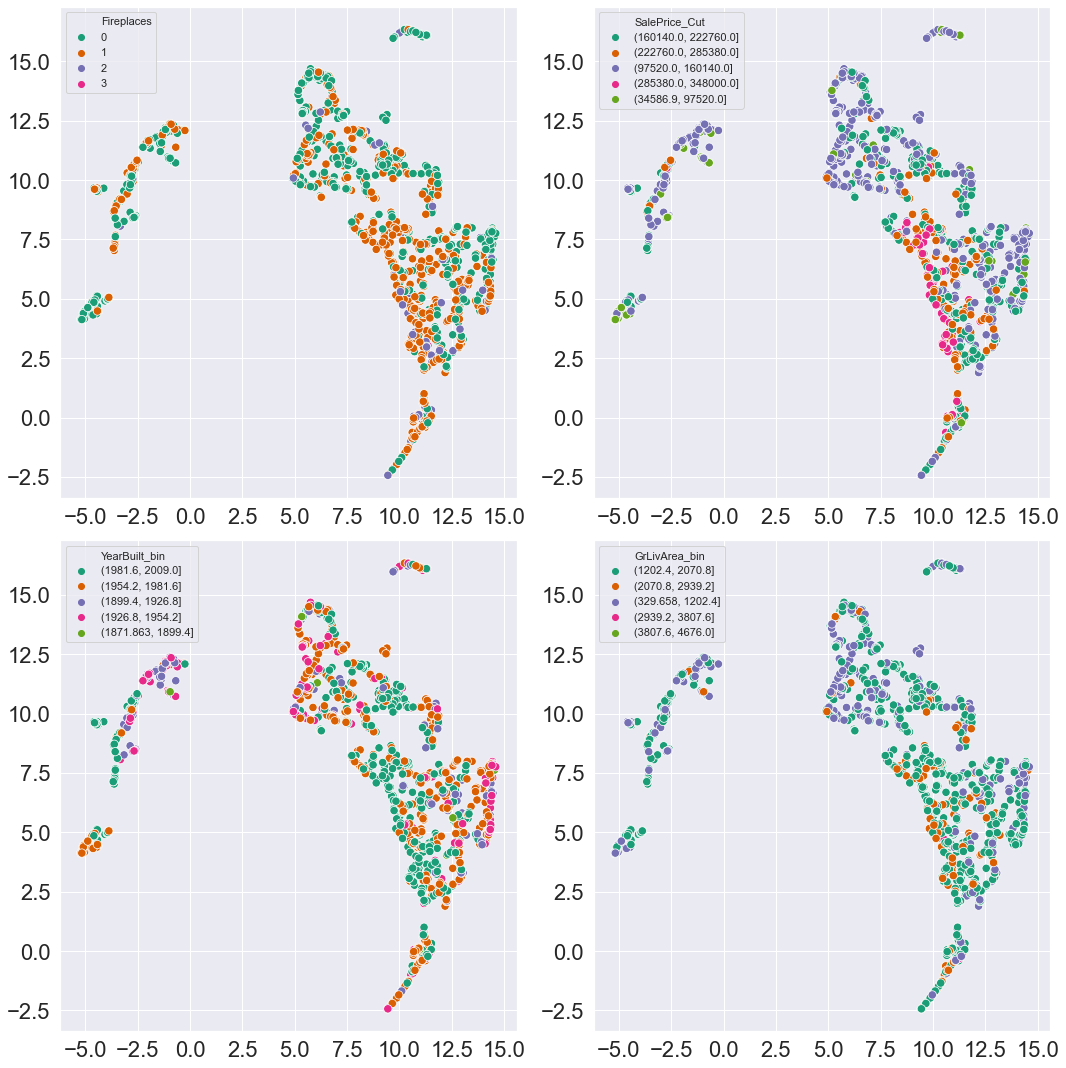

In [96]:
# plotting 4 variables that are grouped by cluster id

most_sign = ['Fireplaces','SalePrice_Cut','YearBuilt_bin', 'GrLivArea_bin']
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15,15))
sns.set(font_scale=1)
sns.axes_style("whitegrid")
for i in enumerate(most_sign):
    qq = sns.scatterplot(x=scores_umap[:,0],y=scores_umap[:,1],ax=axes[i[0]//n_row,i[0]%n_col],\
                     hue=df_umap_kmeans[i[1]],s=70,palette="Dark2")
    ;
plt.legend().set_title('')
plt.tight_layout()

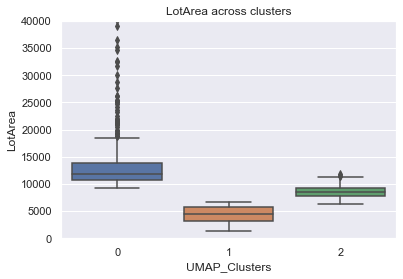

In [97]:
sns.boxplot(x='UMAP_Clusters', y='LotArea', data=df_umap_kmeans)
plt.title('LotArea across clusters')
plt.ylim(0, 40000)
plt.show()

### Highlights:
- 3 clusters seem reasonable
- Cheaper homes tend to be smaller and are less likely to have fire places
- More expensive homes tend to be larger and are more likely to have at least 1 fire place
- Homes built between 1950 - 1980 tend to be relatively small
- Lot area doesn't appear to have many values overlap between clusters

## Results

### Dimensionality Reduction:
UMAP has my vote due to its ability to preserve local and global relationships. This allows us to visualize the unique clusters a bit easier. PCA is hard to beat when it comes to speed but UMAP adds that additional layer as an effective communication tool. 

### Clustering: 
GMM with UMAP has my vote because the analysis is quick, the cluster visualization is effective, and GMM can handle nonlinear geometries.

## Discussion and Recommendations

These clusters should be further evaluated with regression models to determine how each home compares to its clustered peers. Some homes might be high-graded for investment opportunities based on the results of the analysis. In a perfect world, each cluster would represent different forms of upside or investment types (i.e. rentals, flippers, too risky). If the results do not provide beneficial or actionable information, then it might be useful to go back and revisit the feature selection process and/or clustering parameter tuning methods.